<img src="treeofscience.jpg" width="542">

The idea of this project is to provide a solution for many users who are facing the same problem all the time. Let's imagine that a person wants to start learning about a new field of science. It can be difficult to establish where to start from and which topics are most important  to be covered in order to get fast understanding of the field. Our application is a solution designed exactly to find out where to start from and how to cover the most important subjects as fast as possible, so that an inexperienced person can master a field of science. Our application called <b>“Tree of Science”</b> aims to help its users to get an overview about the topic which the user wants to master, by filtering all the data related to the topic and returning only the most meaningful subjects related to that topic. 

<font color='grey' size = 6 ><b><i>1. Motivation </i></b></font>

Wikipedia articles was chosen as the dataset to work with. Wikipedia is a widely used source of information which is free and open to anyone[1].
Many student across the world use wikipedia for various reasons and it is a very useable tool for studying. In this project, it will be investigated how network science and language processing can be used to analyse wikipedia. It will be examined if this has potential to create a tool which can help students and other learners. Wikipedia contains so much knowledge that it can sometimes be difficult to figure out what to read to learn about a specific topic and actually in which order it should be done. 
In order to make it easier to browse and figure out what is most important to learn, the articles will be used to create a network. To initially work with six topics has been chosen to work with. The six topics are:
- electronic engineering, 
- electrical engineering, 
- computer science, 
- robotics, 
- mechanics,
- aerospace engineering

These scientific fields relate to each other so it can create a network. It can also potentially create interesting communities that intertwine between the fields. It should be noted that these six areas are only needed for the initial work on the project. 

The goal of the project is that any scientific field can be analysed. The user should simply be able to give a scientific field as input and from this the network, language processing and all calculations will be done. A foreseeable output of the field will then be presented back to the user. Website, which is a final product of this project, supports the following features:
- finding the most important terms from indicated branch of science,
- creating communities (group of terms around specific topic in the branch) inside field of science,
- providing learning paths, which would enable user to learn about specific topics in the right way (read articles in the wikipiedia in ordered way)
- world cloud presenting each field of study, which would let to know user whether he already is somehow familirized with the field or the nomenclature is completely foreign to him


<font color='grey' size = 6 ><b><i>2. Basic stats. Lets understand the dataset better </i></b></font>

The main goal of the project is to create a network, of which nodes will represent scientific terms from different fields of science and edges would provide links between them, as links in wikipedia articles. One of the most crucial stages of the project is to collect reliable set of terms (definitions) connected to various branches of science, which would represent specific field and at the same time would contain most important words that are needed to define the subject. For this purpose information presented in wikipedia (different categories lists or glossaries) turned out to be useless, since terms specified there were very random, and for many scientific fields there was lack of any term list. The group has conducted a research through the web, which enabled to create a satisfactory list of terms from a few branches of science, which were presented in separate webpages. For this purpose, a few different scripts were written, which helped to parse all needed terms from html representation of web pages.

<font color='green' size = 5 ><b><i>CODE: LIBRARIES AND DECLARATIONS  </i></b></font>

In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2500px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [86]:
#--------------------------------------------- LIBRARIES --------------------------------------------
import networkx as nx
import json
import io
import re
import community
import urllib2
import codecs
import operator
import matplotlib
import matplotlib.pyplot as plot
import unicodedata
import urllib
import numpy as np
import math
from urllib2 import quote
from urllib2 import unquote
from __future__ import division
from sets import Set
from urllib import urlopen
import sys

import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')


%matplotlib inline

In [3]:
#--------------------------------------------- DECLARATIONS --------------------------------------------
folderName = 'final_2'
folderWithPlots = 'plots'
aerospace_list = []
mechanics_list = []
robotics_list = []
electronic_list = []
electrical_list = []
computer_science_list = []
all_terms_list = []

scienceTypes = [aerospace_list, mechanics_list,  robotics_list, electronic_list, electrical_list, computer_science_list, all_terms_list]
scienceTypesNames = ["aerospace_list", "mechanics_list", "robotics_list", "electronic_list", "electrical_list", "computer_science_list", "all_terms_list"]
scienceNames = ["aerospace", "mechanics", "robotics", "electronic", "electrical", "computer science"]

<font color='green' size = 5 ><b><i>CODE: CREATING LIST OF TERMS FROM HTML PAGES  </i></b></font>

In [10]:
#--------------------------- CREATING TERMS LIST FROM TEXT COPIED FROM WIKI API (retrieving)--------------------------------------
# three branches are downloaded here
_listLen = 0
inputList = ['aerospaceText.txt', 'mechanicsText.txt', 'roboticsText.txt' ]
for i in range(len(inputList)):
    _string = io.open(folderName +'/' +  'text_source' + '/' + inputList[i], 'r', encoding='utf-8')
    _string = _string.read().lower()   
    _list = re.findall(r'\[\[(.*?)\]\]', _string)
    
    _list = list(set(_list))

    f = codecs.open(folderName +'/' + 'lists_1' + '/' + scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    for item in _list:
        f.write("%s\n" % item)
    f.close()
    _listLen = _listLen + len(_list)

In [11]:
#--------------- CREATING TERMS LIST FROM DIFFERENT WEB PAGES (GLOSSARIES), EACH CASE IS DIFFERENT -------------
url = "http://www.math.utah.edu/~wisnia/glossary.html"
html = urlopen(url).read()
html = html.lower()   
computer_science_list = re.findall ( '<h3>(.*?)</h3>', html, re.DOTALL)

computer_science_list = list(set(computer_science_list))

f = codecs.open(folderName +'/' + 'lists_1' + '/' +"computer_science_list"+'.txt', 'w', encoding = 'utf-8')
for item in computer_science_list:
    f.write("%s\n" % item)
f.close()
#------------------------------------------------------------------------------------------------------------
url = "http://www.youngco.com/young2.asp?ID=4&Type=3"
html = urlopen(url).read()
html = html.lower()   
electrical_list = re.findall ( '<font class="term"><b>(.*?)</b></font>', html, re.DOTALL)

electrical_list = list(set(electrical_list))

f = codecs.open(folderName +'/' + 'lists_1' + '/' +"electrical_list"+'.txt', 'w', encoding = 'utf-8')
for item in electrical_list:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue
f.close()
#------------------------------------------------------------------------------------------------------------
electronic_list = []
for letter  in "abcdefghijklmnopqrstuvwxyz":
    temp_list = []
    url = "http://www.hobbyprojects.com/dictionary/"+letter + ".html"
    html = urlopen(url).read()
    html = html.lower()   
    temp_list = re.findall ( '<p><b>(.*?)</b>', html, re.DOTALL)
    electronic_list = electronic_list + temp_list

electronic_list = list(set(electronic_list))

f = codecs.open(folderName +'/' + 'lists_1' + '/' +"electronic_list"+'.txt', 'w', encoding = 'utf-8')
for item in electronic_list:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue
f.close()

In [12]:
print "All collected terms: ", len(electronic_list)+len(electrical_list)+len(computer_science_list) + _listLen

All collected terms:  3074


The first stage of data preprocessing has ended up with 3074 terms from six different branches: 
- aerospace
- mechanics
- robotics
- electronic
- electrical
- computer science

The next part of works has required manual work with the list of terms. It was needed to remove all unwanted links such as names of categories, names of people or other trash, which is very difficult to get rid of using scripts.


After mentioned operations as well as removing all duplicates, the amount of terms has decreased to 2988. List of terms has been saved to a new folder. 

In [13]:
#----------------------------------- READ LISTS FROM FILES (folder 'lists_2') ---------------------------------------------
for i in range(6):
    f = io.open(folderName +'/' +'lists_2/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)

In [15]:
#after manual edition, removing duplicates from seperate branch
for i in range(6):
    elementSet = set(scienceTypes[i])
    element = list(elementSet)
    scienceTypes[i] = element

all_size = 0
print "Size of lists, after manual operations and removing duplicates: "
for i in range(6):
    print "- ", scienceTypesNames[i], len(scienceTypes[i])
    all_size = all_size +len(scienceTypes[i])
print "All terms: ", all_size

# stroing terms lists into files
for k in range(6):
    f = codecs.open(folderName +'/' +'lists_3/'+scienceTypesNames[k]+'.txt','w', encoding = 'utf-8')
    for item in scienceTypes[k]:
        try:
            f.write("%s\n" % item)
        except Exception, e:
            continue

    f.close()

Size of lists, after manual operations and removing duplicates: 
-  aerospace_list 312
-  mechanics_list 304
-  robotics_list 96
-  electronic_list 751
-  electrical_list 1103
-  computer_science_list 422
All terms:  2988


At this point, there is 2988 terms, taken from all branches. There may occur duplicates, since the same term can occur in many branches.

<font color='green' size = 5 ><b><i>CODE: DOWNLOADING ARTICLES FROM WIKIPEDIA ACCORDING TO TERMS LIST</i></b></font>


<i>(restart kernel first)</i>

The subsequent stage of works was the most crucial for the further development of the project. All terms collected from different sources, had to be found in wikipedia. For this purpose a special script was written. What is more, written algorithm was able to follow all redirection to other pages, provided by wikipedia (which represented around 30% of all terms). Terms, for which there was no article, were removed from lists. Content of articles has been downloaded to separate files, ready for further operations.


The next stage in the data preparations, was to download all terms. This operations was very crucial and had great impact on the network. The most important fact, which has to be pointed out, is that terms were taken from glossaries from different web pages, that is why many terms may not occur in the wikipedia. However, a lot of terms can have slightly different formatting, which may result with redirecting it to another wikipedia article. It is very important to catch as many articles about terms as possible. Written algorithm was able to follow all redirection to other pages, provided by wikipedia (which represented around 30% of all terms). Terms, for which there was no article, were removed from lists. Content of articles has been downloaded to separate files, ready for further operations. Better preprocessed dataset - more interesting and reliable network would be.

In [10]:
#----------------------------------- READ LISTS FROM FILES (folder 'lists_3') ---------------------------------------------
for i in range(6):
    f = io.open(folderName +'/' +'lists_3/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)

In [16]:
#----------------------------------- DOWNLOAD PAGE FOR EACH TERM FROM WIKIPEDIA (saves in 'terms' folder) ---------------------------------------------
#https://en.wikipedia.org/w/api.php?action=query&titles=Spider-Man&prop=revisions&rvprop=content&format=json
addRedirectedPageAll = []
removeEmptyPageAll = []
removeRedirectedPageAll = []

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles="
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

# going through each branch list and downloading files with terms
for k in range(0,6):
    #declare lists for terms which are going to be removed or added
    addRedirectedPage = []
    removeEmptyPage = []
    removeRedirectedPage = []
    print "k to: ", k
    for term in scienceTypes[k]:
        #adjustments which enables to format in right way term string to cooperate with wiki api
        s = list(term)
        for i in range(len(s)):
            if(s[i] == ' '):
                s[i] = '_'

        termNameAdjusted = "".join(s)
        termNameAdjusted = urllib.quote(termNameAdjusted.encode("utf8"))

        # creating query
        query = "%s%s&%s%s&%s&%s" % (baseurl,action,title,termNameAdjusted,content,dataformat)

        print query

        query.encode('utf-8')
        wikiResponse = urllib2.urlopen(query)
        wikiSource = wikiResponse.read()

        #check whether page is empty
        wikiJson = json.loads(wikiSource)
        pageEmpty = wikiJson["query"]["pages"].keys()[0]
        print pageEmpty

        if pageEmpty == '-1':
            removeEmptyPage.append(term) 
            continue
        else:
            # check whether the page is redirected
            pageId = wikiJson["query"]["pages"].keys()[0]
            pageRedirected = wikiJson["query"]["pages"][pageId]["revisions"][0]["*"]
            # if page is redirected, remove the failure link and add the proper one
            if(pageRedirected[:9].lower() == '#redirect' ):
                goToPage = re.findall(r'\[\[(.*?)\]\]', pageRedirected)
                goToPage = goToPage[0]
                addRedirectedPage.append(goToPage)
                removeRedirectedPage.append(term)
                print goToPage
            else:
                # if everything is fine, donwload the page to the file
                encoding = wikiResponse.headers['content-type'].split('charset=')[-1]
                ucontent = unicode(wikiSource, encoding)
                try:
                    f = io.open(folderName +'/' +'terms/'+term, 'w', encoding = 'utf-8')
                    f.write(ucontent)
                    f.close()
                except Exception, e:
                    removeEmptyPage.append(term)
                    print "Oops! Something went wrong"
                    continue


    # removing elements from indicated branch list and replacing them with new (added)    
    print "k to: ", k
    print "remove empty", len(removeEmptyPage)
    for element in removeEmptyPage:
        scienceTypes[k].remove(element)

    print "remove redirected", len(removeRedirectedPage) 
    for element in removeRedirectedPage:
        scienceTypes[k].remove(element)    

    print "add redirected", len(addRedirectedPage)        
    for element in addRedirectedPage:
        scienceTypes[k].append(element.lower())
        
    # filling lists with modified terms
    removeEmptyPageAll = removeEmptyPageAll  + removeEmptyPage  
    removeRedirectedPageAll = removeRedirectedPageAll + removeRedirectedPage
    addRedirectedPageAll = addRedirectedPageAll + addRedirectedPage

In [ ]:
#---------------- SAVING TO FILE ALL TERMS WHICH HAVE TO BE REMOVED DUE TO EMPTY --------------------------------
f = codecs.open(folderName +'/' + 'lists_3' + '/' +"remove_empty_list"+'.txt', 'w', encoding = 'utf-8')
for item in removeEmptyPageAll:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue
f.close()

#---------------- SAVING TO FILE ALL TERMS WHICH HAVE TO BE REMOVED DUE TO REDIRECTED --------------------------------
f = codecs.open(folderName +'/' + 'lists_3' + '/' +"remove_redirected_list"+'.txt', 'w', encoding = 'utf-8')
for item in removeRedirectedPageAll:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue
f.close()

#----- SAVING TO FILE ALL TERMS WHICH HAVE TO BE DOWNLOADED IN NEXT STEP DUE TO REDIRECTION-----------
f = codecs.open(folderName +'/' + 'lists_3' + '/' +"add_list"+'.txt', 'w', encoding = 'utf-8')
for item in addRedirectedPageAll:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue
f.close()

As mentioned before. If some redirections occured, failrue terms has been removed from terms lists and instead a right term has been added (this required some parsing). Below, all articles for redirected terms are going to be downloaded.

In [ ]:
#------------------------------------- DOWNLOADING ALL TERMS WHICH PAGES WERE REDIRECTED -----------------------------------------
#read terms which has to be downloaded
addPage =[]
removeTrash =[]
f = io.open(folderName +'/' +'lists_3/' +"add_list"+'.txt', 'r', encoding='utf-8')
lines = f.readlines()
tempList = []
tempList = [e.strip() for e in lines]
for element in tempList:
    addPage.append(element)

# remove all duplicates which occurs in the list
print len(addPage)
addPageSet = set(addPage)
addPage = list(addPageSet)
print len(addPage)

# loop performing downloads
for term in addPage:
    s = list(term)
    for i in range(len(s)):
        if(s[i] == ' '):
            s[i] = '_'

    termNameAdjusted = "".join(s)
    termNameAdjusted = urllib.quote(termNameAdjusted.encode("utf8"))

    query = "%s%s&%s%s&%s&%s" % (baseurl,action,title,termNameAdjusted,content,dataformat)

    print query

    query.encode('utf-8')
    wikiResponse = urllib2.urlopen(query)
    wikiSource = wikiResponse.read()

    #check whether there is sth in the page
    wikiJson = json.loads(wikiSource)
    pageEmpty = wikiJson["query"]["pages"].keys()[0]
    print pageEmpty

    if pageEmpty == '-1': 
        print "EMPTY PAGE!"
        termName = term.lower()
        removeTrash.append(termName)
        continue
    else:
        pageId = wikiJson["query"]["pages"].keys()[0]
        pageRedirected = wikiJson["query"]["pages"][pageId]["revisions"][0]["*"]
        if(pageRedirected[:9].lower() == '#redirect' ):
            goToPage = re.findall(r'\[\[(.*?)\]\]', pageRedirected)
            goToPage = goToPage[0]
            termName = term.lower()
            removeTrash.append(termName)
            print "REDIRECTED PAGE!", goToPage
        else:
            encoding = wikiResponse.headers['content-type'].split('charset=')[-1]
            ucontent = unicode(wikiSource, encoding)

            try:
                termName = term.lower()
                f = io.open(folderName +'/' +'terms/'+termName, 'w', encoding = 'utf-8')
                f.write(ucontent)
                f.close()
            except Exception, e:
                termName = term.lower()
                removeTrash.append(termName)
                print "Oops! Something went wrong"
                continue

In [ ]:
# ------------- REMOVING TERMS WHICH FAILED TO DOWNLOAD IN THE FINAL STAGE (there will be only a few) -----------------
for i in range(6):
    for removeElement in removeTrash:
        if removeElement in scienceTypes[i]:
            scienceTypes[i].remove(removeElement)
            
print "Size of lists, after removing a few trash terms all pages' files: "
for i in range(7):
    print scienceTypesNames[i], len(scienceTypes[i])

In [ ]:
#writing a new version of lists to files
for i in range(6):
    f = codecs.open(folderName +'/' +'terms_lists/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    tempSet = set(scienceTypes[i])
    tempList = list(tempSet)

    tempList.sort()
    for item in tempList:
        f.write("%s\n" % item)
    f.close()

Finally, 1916 files has been downloaded. This datase takes 42.2 MB of memory on the disk and will be used to create a network of terms (articles) from wikipedia and all firther analysis is going to be conducted on this dataset. All performed actions during cleaning data as well as preprocessing has ensured that each file contains actual article and is well defined.


<font color='green' size = 5 ><b><i>CODE: CREATING NETWORK</i></b></font>


<i>(restart kernel first)</i>

The network has been created out of <b>1916</b> mentioned terms, which formed nodes. Each article has been parsed and links to other articles has been retrieved. Those links has formed <b>13689</b> edges, which allowed us to create a very interesting network with extensive amount of connections.


In [4]:
#----------------------------------- READ LISTS FROM FILES (folder 'terms_lists') ---------------------------------------------
for i in range(6):
    f = io.open(folderName +'/' +'terms_lists/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)

In [5]:
#----------------------------------- CREATE ALL_TERMS_LIST (folder 'terms_lists') ---------------------------------------------
tempList = []
for i in range(6):
    tempList = tempList + scienceTypes[i]

tempSet = set(tempList)
scienceTypes[6] = list(tempSet)

# saving all terms list to terms_lists folder
f = codecs.open(folderName +'/' +'terms_lists/'+"all_terms_list"+'.txt', 'w', encoding = 'utf-8')
for item in scienceTypes[6]:
    try:
        f.write("%s\n" % item)
    except Exception, e:
        continue
f.close()

In [6]:
#--------------------------------------------- ADDING NODES TO THE NETWORK --------------------------------------
all_terms_list = scienceTypes[6]
TG=nx.DiGraph()
TG.add_nodes_from(all_terms_list)

In [7]:
#------------------------------------- ADDING EDGES TO NODES, AFTER TEXT ANALYSIS -------------------------------
testersum = 0
for i in range(len(all_terms_list)):
    term = all_terms_list[i]
    term_string = io.open(folderName +'/' +'terms/'+term, 'r', encoding='utf-8')
    term_list = re.findall(r'\[\[(.*?)\]\]', term_string.read().lower())
    
    termRemove = []
    
    #removing all unnecessary terms
    for element in term_list:
        if not (element in all_terms_list):
            termRemove.append(element)
            
    for element in termRemove:
        term_list.remove(element)
        
    for element in term_list:
        testersum+=1
        TG.add_edge(term,element)

Number of nodes:  1916
Number of edges:  13689


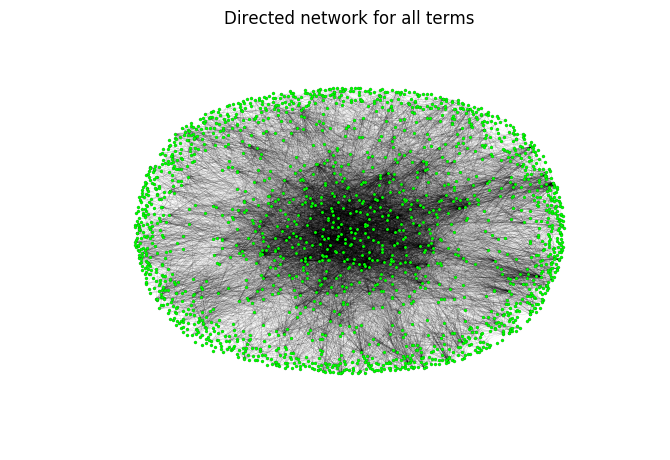

In [8]:
#---------------------------------------- INFORMATION ABOUT THE NETWORK AND PLOT --------------------------------
print "Number of nodes: ", TG.number_of_nodes()
print "Number of edges: ", TG.number_of_edges()

#printing plot
pos=nx.spring_layout(TG, k=0.6) # positions for all nodes
nx.draw(TG, pos, node_size = 5, node_color = '#00ff00', width=0.01, linewidths=0.1)
plot.title("Directed network for all terms")
plot.savefig(folderName+"/network_graph_1.pdf")
plot.show()

Having used more advanced network features, it was checked whether created network has more than one component, which would mean that probably there are some separate terms, which does not link to any other node, as well as does not have any input link. It was decided to get rid of them and create a Giant Connected Component, which will enable to optimize the network and hopefully will help in finding more clear results coming from network analysis.

It is determined how many components our graph has. If the number of weakly connected components is greater than 1 then we continue to work on the WCC subgraph with biggest size.

In [9]:
#---------------------------------------- CREATING THE WCC NETWORK AND PLOT --------------------------------

print "The number of weakly connected components:", nx.number_weakly_connected_components(TG)

# weakly connected components as subgraphs
TG_sub = sorted(nx.weakly_connected_component_subgraphs(TG), key=len, reverse=True)

# extract biggest
TG_WCC = TG_sub[0]
print 'The size (number of nodes) of subgraph with largest weakly connected component is:', TG_WCC.number_of_nodes()

# save list of removed terms
wcc_remove_list = []

for e in TG_sub[1:]:
    for f in e.nodes():
        wcc_remove_list.append(f)

f = codecs.open(folderName +'/' +'terms_lists_wcc/'+'wcc_remove_list.txt', 'w', encoding = 'utf-8')
wcc_remove_list.sort()
for item in wcc_remove_list:
    f.write("%s\n" % item)
f.close()

print "Number of removed terms from the network: ", len(wcc_remove_list)

The number of weakly connected components: 365
The size (number of nodes) of subgraph with largest weakly connected component is: 1544
Number of removed terms from the network:  372


Having analysed all 369 terms, which has been removed from the network, it can be stated that operation of creating giant connected component was a good idea. Terms are usually words, which depending on the field of the science means something different, nevertheless it is not included in the branches we have, at least not in the wikipedia. If such connection would exist, in the link list of such a term, another node from the network would occur, which in turn would result in connecting to the GCC.


In [10]:
# ------------------- UPDATING ALL BRANCHES LISTS BY REMOVING ALL TERMS COLLECTED IN THE 'wcc_remove_list' ------------    
for i in range(7):
    for removeElement in wcc_remove_list:
        if removeElement in scienceTypes[i]:
            scienceTypes[i].remove(removeElement)
    
# writing a new version of lists to files in the folder 'terms_lists_wcc' 
for i in range(7):
    f = codecs.open(folderName +'/' +'terms_lists_wcc/'+scienceTypesNames[i]+'.txt', 'w', encoding = 'utf-8')
    scienceTypes[i].sort()
    for item in scienceTypes[i]:
        f.write("%s\n" % item)
    f.close()

Number of nodes:  1544
Number of edges:  13670


IOError: [Errno 2] No such file or directory: 'plots/all_branches_network_gig_connect_comp.png'

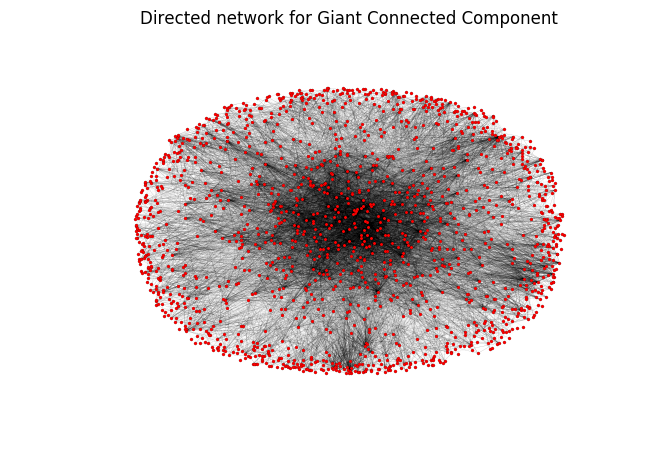

In [11]:
#---------------------------------------- INFORMATION ABOUT THE WCC NETWORK AND PLOT --------------------------------
print "Number of nodes: ", TG_WCC.number_of_nodes()
print "Number of edges: ", TG_WCC.number_of_edges()

# printing plot
pos=nx.spring_layout(TG, k=0.6) # positions for all nodes
nx.draw(TG_WCC, pos, node_size = 5, node_color = '#ff0000', width=0.01, linewidths=0.1)
plot.title("Directed network for Giant Connected Component")
plot.savefig(folderName+"/network_graph_wcc.pdf")
plot.savefig(folderWithPlots + "/all_branches_network_gig_connect_comp.png")
plot.show()

The network has end up with <b>1544 nodes</b> (which makes 372 lonely nodes removed) and <b>13670 edges</b> (only 19 edges removed). Those results confirms that there were many useless terms in the context of a network structure, which had to be removed. The network above is more consist and gives a better prognosis for interesting results of analysis.

To sum up, the below numbers presents network on which further analysis is going to be performed:

<b>
- Number of branches: 6
- Number of nodes: 1544
- Number of edges: 13670
- Size of dataset: 42.2 Mb
</b>

The next step in analysis was to create an undirected version of the graph, which is going to be used in case of detection of communities using Louvain method for community detection. 

In [12]:
# --------------------------------- CREATING AN UNDIRECTED VERSION OF THE GRAPH -----------------
UTG_WCC = TG_WCC.to_undirected()

<font color='green' size = 5 ><b><i>CODE: CREATING NON OVERLAPPING LISTS OF BRANCHES</i></b></font>

The consequitive operations are intended to creat a non overlapping lists of branches. Those lists are going to be useful in a few cases. Among others, it will enable us to color nodes of the network from the same branch, with the same color. Moreover, only non overlapping nodes can be used to calculate modularity and to use the Louvain method for community detection.

It is needed to assign terms that are part of multiple branches, only to one branch. We will handle it by creating a set of six new branches, where we take all of the terms that belong to more than one branch and assign them to the branch that they have the most connections to.

In [13]:
# ----------------------------------------------- REMOVING OVERLAPPING --------------------------------------------
termsCount = {}
sorted_termsCount = {}

# counting in how many branches each term occurs
all_terms_list = scienceTypes[6]
for element in all_terms_list:
    termsCount[element] = 0

for termType in scienceTypes[:6]:
    for i in range(len(termType)):       
        termsCount[termType[i]] += 1

# ordering the number of occurence of each term in branches
sorted_termsCount = sorted(termsCount.items(), key=operator.itemgetter(1), reverse=True)

moreThanOneBranch = []
oneBranch = []

# declaring new sets, which will represent non overlapping branches
aerospace_branch = Set([])
mechanics_branch = Set([])
robotics_branch = Set([])
electronic_branch = Set([])
electrical_branch = Set([])
computer_science_branch = Set([])

for element in sorted_termsCount:
    if element[1] > 1:
        moreThanOneBranch.append(element[0])
    else:
        oneBranch.append(element[0])
        

#1st stage -  unambiguously assigned to a branch
for term in scienceTypes[0]:
    if termsCount[term] == 1:
        aerospace_branch.add(term)
        
for term in scienceTypes[1]:
    if termsCount[term] == 1:
        mechanics_branch.add(term)

for term in scienceTypes[2]:
    if termsCount[term] == 1:
        robotics_branch.add(term)

for term in scienceTypes[3]:
    if termsCount[term] == 1:
        electronic_branch.add(term)

for term in scienceTypes[4]:
    if termsCount[term] == 1:
        electrical_branch.add(term)

for term in scienceTypes[5]:
    if termsCount[term] == 1:
        computer_science_branch.add(term)

In [14]:
# indicateing list of neighbours of terms which has occured more then only in one branch
for term in moreThanOneBranch:
    listOfNeighbors = UTG_WCC.neighbors(term)

    removeNeighbour = []

    for element in listOfNeighbors:
        if element in moreThanOneBranch:
            removeNeighbour.append(element)

    for element in removeNeighbour:
        listOfNeighbors.remove(element)

    aeros = 0
    mecha = 0
    robot = 0
    elect = 0
    electri = 0
    compu = 0
    
    # calculating, from which branches are neighbours
    for element in listOfNeighbors:
        if element in scienceTypes[0]:
            aeros += 1
        elif element in scienceTypes[1]:
            mecha += 1
        elif element in scienceTypes[2]:
            robot += 1
        elif element in scienceTypes[3]:
            elect += 1
        elif element in scienceTypes[4]:
            electri += 1
        elif element in scienceTypes[5]:
            compu += 1
    rankDict = {'aeros' : aeros, 'mecha' :mecha, 'robot':robot, 'elect':elect, 'electri':electri, 'compu':compu}
    # finding which branch wins for each analysed term
    winner = max(rankDict, key=rankDict.get)
    
    # assinging to indicated branch
    if winner == 'aeros':
        aerospace_branch.add(term) 
    elif winner == 'mecha':
        mechanics_branch.add(term) 
    elif winner == 'robot':
        robotics_branch.add(term) 
    elif winner == 'elect':
        electronic_branch.add(term) 
    elif winner == 'electri':
        electrical_branch.add(term) 
    elif winner == 'compu':
        computer_science_branch.add(term) 

In [15]:
# ------ WRITING AN NON OVERLAPPING LISTS OF BRANCHES TO THE NEW FOLDER CALLED 'terms_lists_wcc_without_overlapping' ----------
scienceBranches = [aerospace_branch, mechanics_branch,  robotics_branch, electronic_branch, electrical_branch, computer_science_branch]
scienceBranchesNames = ["aerospace_branch", "mechanics_branch",  "robotics_branch", "electronic_branch", "electrical_branch", "computer_science_branch"]

for i in range(6):
    f = codecs.open(folderName +'/' +'terms_lists_wcc_without_overlapping/'+scienceBranchesNames[i]+'.txt', 'w', encoding = 'utf-8')
    tempList = list(scienceBranches[i])
    tempList.sort()
    for item in tempList:
        f.write("%s\n" % item)
    f.close()

At this point a non overlapping lists of branches are saved to files and are going to be used in further analysis.

<font color='green' size = 5 ><b><i>CODE: BRANCH NETWORK</i></b></font>

To see how the branches relate to eachother on an general level it was decided to create a network with the branches as nodes. This would be able to show the total amount of links going between branches and hereby reveal how different branches depend on each other in the network.

In [16]:
#create a dict which will be used to store out degree from each branch to each other branch
branch_network_degrees = {}
for name in scienceTypesNames[:-1]:
    branch_network_degrees[name] = {}
    for n in scienceTypesNames[:-1]:
        #we give all branch out degree initial value 0
        branch_network_degrees[name][n] = 0

In [17]:
#we open the articles and count the links going to different branches. When then add one to the dict representing
#that branch and to what other branch the link is to
for i in range(len(scienceTypesNames[:-1])):
    for term in scienceTypes[i]:
        term_string = io.open(folderName +'/' +'terms/'+term, 'r', encoding='utf-8')
        term_list = re.findall(r'\[\[(.*?)\]\]', term_string.read().lower())
        
        termRemove = []
        #removing all unnecessary terms
        for element in term_list:
            if not (element in all_terms_list):
                termRemove.append(element)
            
        for element in termRemove:
            term_list.remove(element)
        #we make it a set so we only count a link to another given article once even if it links mulitple times    
        term_list_set = set(term_list)    
        for t in term_list_set:
            for y in range(len(scienceTypesNames[:-1])):
                if t in scienceTypes[y]:
                    branch_network_degrees[scienceTypesNames[i]][scienceTypesNames[y]]+=1

In [18]:
#find number of links going into each branch from all the other branches
branch_network_indegrees ={}
for name in scienceTypesNames[:-1]:
    branch_network_indegrees[name] = 0
    for n in scienceTypesNames[:-1]:
        #we add all the outlinks from each other branch going to this branch up
        branch_network_indegrees[name]+=branch_network_degrees[n][name]
    #we dont want to count degrees going to itself so we substract this
    branch_network_indegrees[name]-=branch_network_degrees[name][name]

In [19]:
branch_number_of_terms = {}
ite = 0
for b in scienceTypesNames[:-1]:
    branch_number_of_terms[b] = len(scienceTypes[ite]) * 10
    ite+=1

branch_indegree_scaled = {}
for b in branch_number_of_terms:
    branch_indegree_scaled[b] = branch_network_indegrees[b] / branch_number_of_terms[b] * 1000

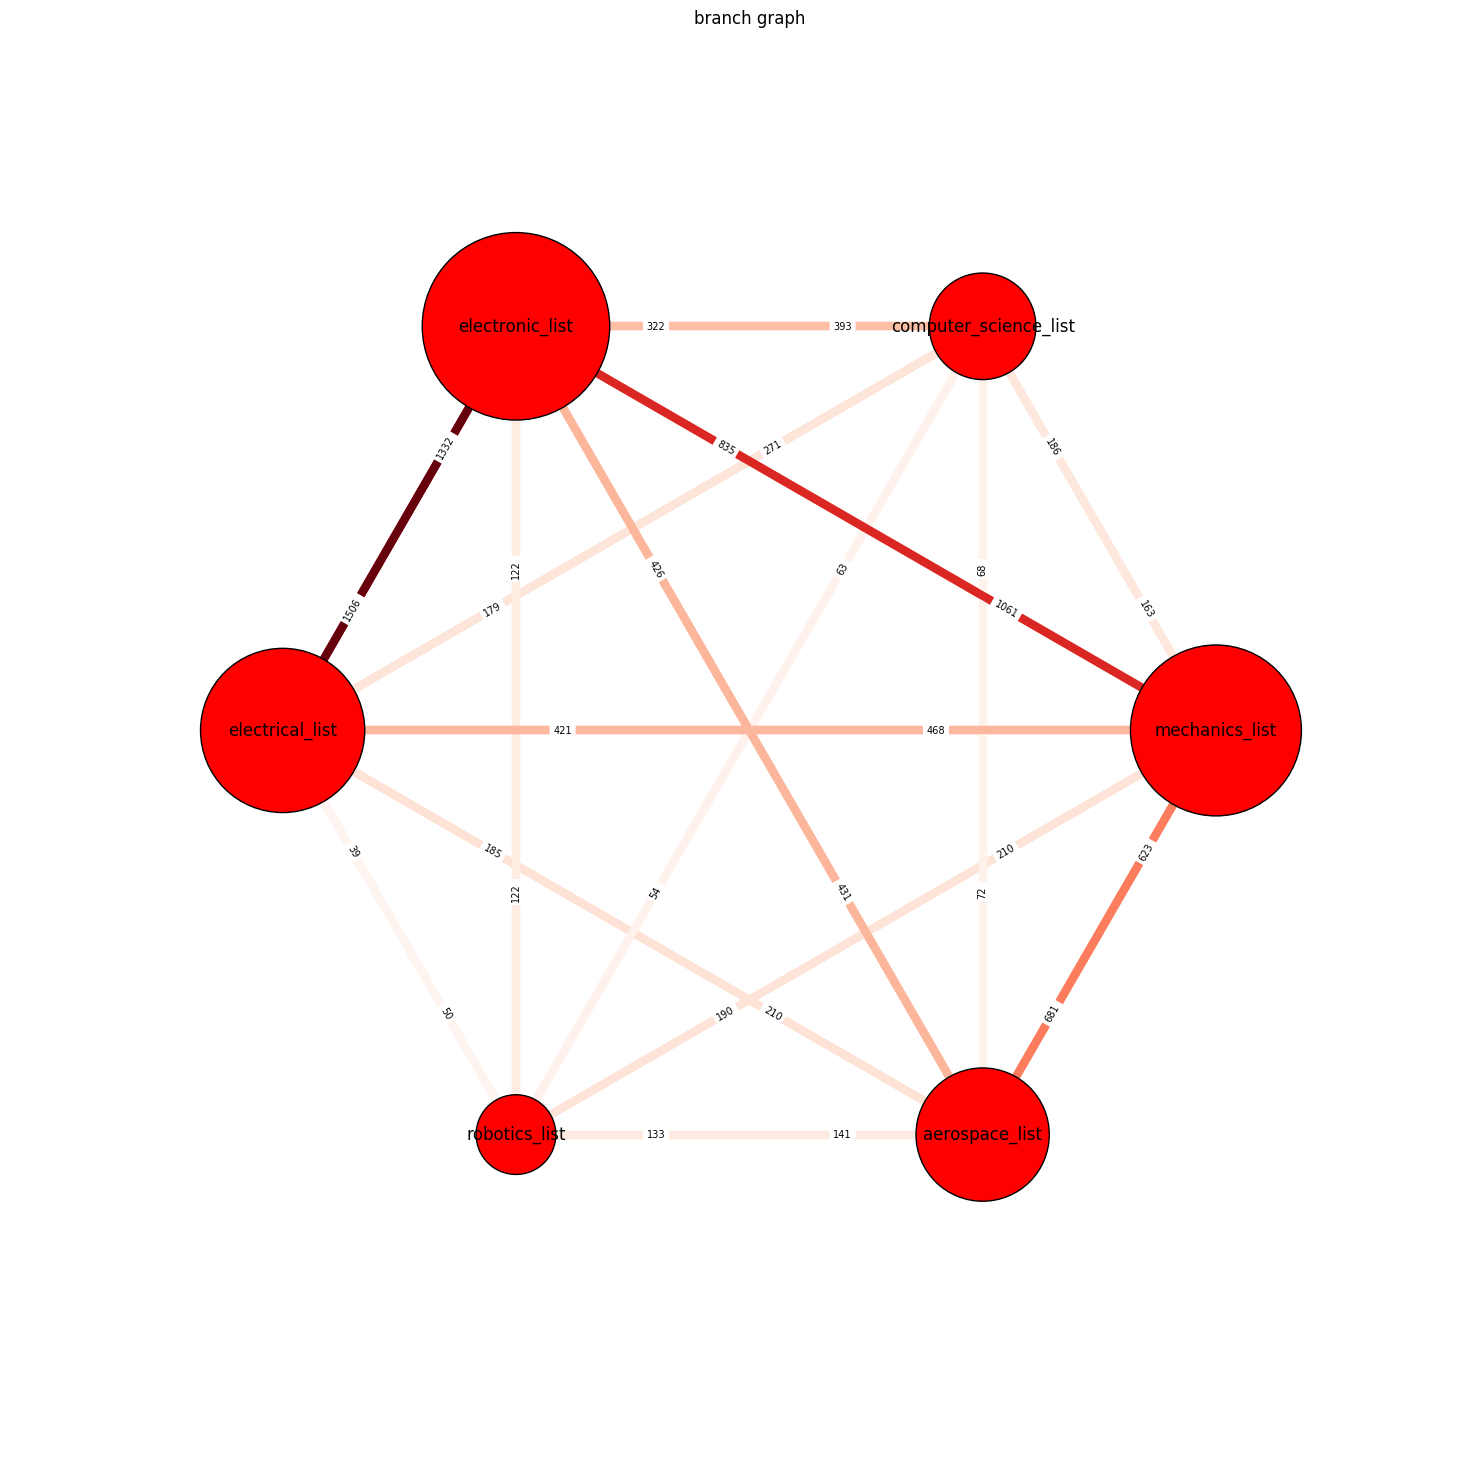

Node size is based on in degree links going to the branch



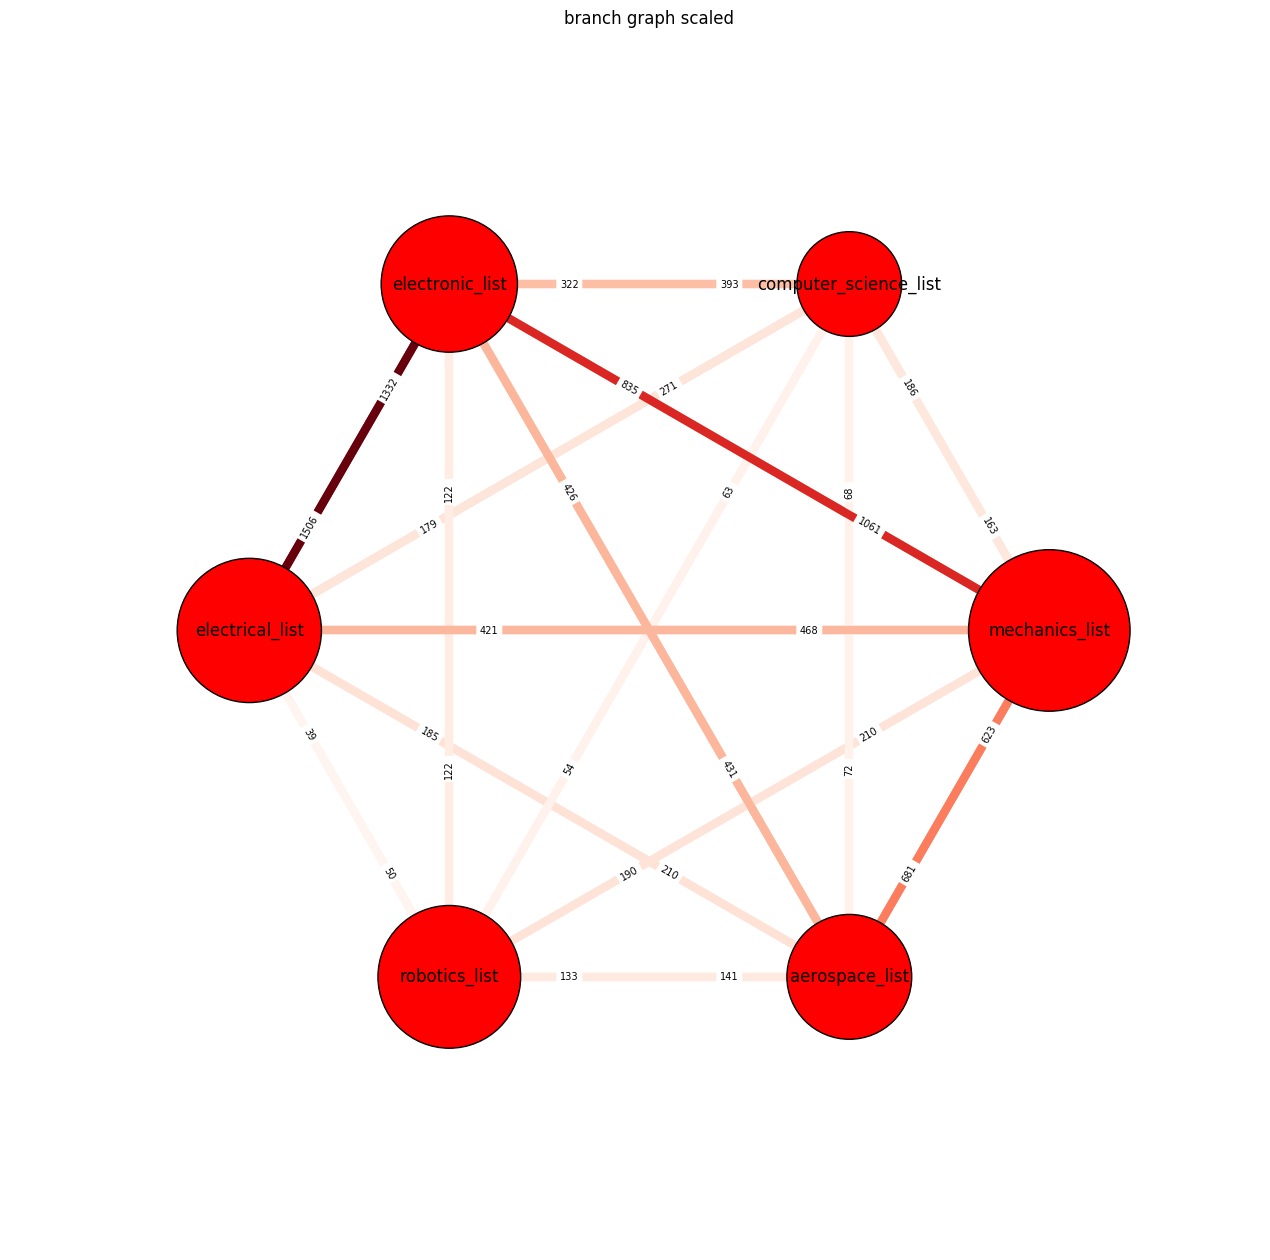

Node size is based on in degree links going to the branch scaled by how many terms the branch has in total



In [20]:
#transform to list for use in nx
branch_network_indegrees_list = branch_network_indegrees.values()
branch_number_of_terms_list = branch_number_of_terms.values()
branch_indegree_scaled_list = branch_indegree_scaled.values()
branch_graph=nx.DiGraph()
branch_graph.add_nodes_from(scienceTypesNames[:-1])

#we add edges between nodes with the weight from the outdegree found
for branch in branch_network_degrees:
    for o in branch_network_degrees[branch]:
        if not branch == o:
            branch_graph.add_edge(branch,o,weight=branch_network_degrees[branch][o])

edges,weights = zip(*nx.get_edge_attributes(branch_graph,'weight').items())
pos = nx.shell_layout(branch_graph)
# printing plot
#nx.draw(branch_graph, pos, 
#        with_labels = True, node_size = [v  for v in branch_network_indegrees_list], node_color = '#ee6420',
#       edgelist=edges, edge_color=weights, width=6.0, arrows = False, edge_cmap=plot.cm.Reds)
plot.figure(figsize=(14,14))
nx.draw(branch_graph, pos,with_labels = True, arrows = False, node_size = [v * 6 for v in branch_network_indegrees_list],
       edgelist=edges, edge_color=weights, width=6.0, edge_cmap=plot.cm.Reds)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in branch_graph.edges(data=True)])
nx.draw_networkx_edge_labels(branch_graph, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)
plot.title("branch graph")
 
#plot.savefig(folderName+"/network_graph_wcc.pdf")
plot.show()
print 'Node size is based on in degree links going to the branch' 
print ''

plot.figure(figsize=(12,12))
nx.draw(branch_graph, pos,with_labels = True, arrows = False, node_size = [v * 15 for v in branch_indegree_scaled_list],
       edgelist=edges, edge_color=weights, width=6.0, edge_cmap=plot.cm.Reds)
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in branch_graph.edges(data=True)])
nx.draw_networkx_edge_labels(branch_graph, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)
plot.title("branch graph scaled")
plot.show()
print 'Node size is based on in degree links going to the branch scaled by how many terms the branch has in total'
print ''

From looking at the network and the list of outgoing links for the branches we get a nice overview of this network and how they relate. We can see that electronic node is the biggest which means that it is most often linked to by other branches. This indicate that the electronic branch is most fundamental for this network and that many of the other branches rely on knowledge from electronics. But if we scale the size, compared to the number of terms in each branch we get that mechanics is most important indicating that the number of terms in electronics, which is the highest, has something to do with how important it is.

From the in degrees, which we can read on the links, it can be seen that the out and in between two nodes is highly connected. In all cases we see that the number between two nodes are very similar. The capacity of the edge indicate how connect they are. We see that electronics is very connected to both mechanics and electrical, the three most significant branches. This could indicate that electronics is the most influential one. We can also see that computer science is likely the branch that fit the least together with the other branches. We see that it is the smallest node when we compare its number of in degree with its size. We can also see that all its edges are rather weak. The same is true for robotics but this might be due to the low number of terms in the branch.

<font color='grey' size = 6 ><b><i>3. Tools, theory and analysis. Describe the process of theory to insight </i></b></font>

The network science tool used by us was NetworkX library. This library offered us efficient Python modules for manipulation and statistical analysis of networks. We also took advantage of the fact that it is a free software product and had a good experience while using it for the previous assignments. We have also used the community module for applying community detection algorithms to our network of words. Additionally, he have used some other utility libraries which helped us with parsing the raw strings, draw plots or visualize word clouds.
Our python script for data analysis is mainly based on statistics and graphs built via the NetworkX library. Besides its ease of use, we have chosen NetworkX because it allowed us to create and manipulate large networks while being a very scalable solution because it is based entirely on the pure-Python "dictionary of dictionary" data structure. In addition to this, NetworkX provided us with the most important tools/means for computing important network-specific information such as: 
- betweenness centrality, 
- eigenvector centrality, 
- in-degree/out-degree, 
- Degree Assortativity Coefficient,
- shortest path between two nodes. 


<font color='green' size = 5 ><b><i>CODE: NETWORK ANALYSIS - FUNCTIONS</i></b></font>

<b>Sort a dictionary in reversed order according to the values

In [26]:
#Function for sorting a dictionary according to the values.
#Parameter: the dictionary. Returns a list of the sorted items in reversed order.
def sortDictionaryReversedByValues(dictionary):
    return sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)

<b>In/Out degree

In [27]:
#Function that computes the in_degree.
#Parameter: the graph. Returns a dictionary.
def getInDegreeList(graph):
    return graph.in_degree()

#Function for printing the degree list. It takes as a parameter the list and
#prints the first "howManyElementsToPrint" number of elements.
def universalPrintList(l, howManyElementsToPrint):
    for i in range(howManyElementsToPrint):
        print str(l[i][0]), " --> ", str(l[i][1])
        
#Function that computes the out_degree.
#Parameter: the graph. Returns a dictionary.
def getOutDegreeList(graph):
    return graph.out_degree()

We are using the in-out degree in order to provide some basic statistics about our network, to compute histogram and scatter plots for the distribution of the degrees. Lastly, this measure helps us getting a complete idea about the network we are analysing by checking out the average in/out degrees or the most highly connected components within the graph.


<b>Degree Distribution

In [28]:
#Function for printing an histogram plot of either in or out degree
#Parameters: dictionary with the degrees and a string "in" or "out" depending of what you want to plot
def plotDegreeDistribution(degreeDictionary, inOrOut, name):
    start = min(degreeDictionary.values())
    end = max(degreeDictionary.values())
    hist, bins = np.histogram(degreeDictionary.values(), bins = end - start, range = (start, end))
    
    plot.plot(bins[:len(hist)], hist)
    if inOrOut is 'in':
        plot.title("Distribution of in-degrees for " + name)
        plot.xlabel('In-degree')
    else:
        plot.title("Distribution of out-degrees for " + name)
        plot.xlabel('Out-degree')
    plot.ylabel('Number of nodes')
    plot.savefig(folderWithPlots+"/Distribution of "+inOrOut+"-degrees " + name + ".png")
    plot.show()

<b>Degree Distribution Logarithmic Scale

In [29]:
def plotLogLogDegreeDistribution(degreeDictionary, inOrOut, name):
    start = min(degreeDictionary.values())
    end = max(degreeDictionary.values())
    hist, bins = np.histogram(degreeDictionary.values(), bins = end - start, range = (start, end))
    
    plot.loglog(bins[:len(hist)], hist, basex = 10)
    plot.grid(True)
    
    plot.ylabel('Number of nodes')
    if inOrOut is 'in':
        plot.title('Loglog scale for in-degrees ' + name)
        plot.xlabel('In-degree')
    else:
        plot.title('Loglog scale for out-degrees ' + name)
        plot.xlabel('Out-degree')
    plot.savefig(folderWithPlots+"/Loglog scale for " + inOrOut+"-degrees " + name + ".png")
    plot.show()

<b>Scatter Plot of In/Out Degree

In [30]:
#Function for plotting the in/out distribution as a scatter.
#Parameters: inDegree dictionary and outDegree dictionary (computed via networkx)
def plotScatterInOutDegree(inDegreeDictionary, outDegreeDictionary, name):
    ax = plot.gca()
    ax.plot(np.array(inDegreeDictionary.values()), np.array(outDegreeDictionary.values()), 'o', c = 'blue',
        alpha = 0.5, markeredgecolor = 'none')
    plot.title('Scatter plot of In/Out Degrees for ' + name)
    plot.xlabel('In-degrees')
    plot.ylabel('Out-degrees')
    plot.savefig(folderWithPlots+"/Scater plot for of In-Out Degrees for " + name + ".png")
    plot.show()

<b>Betweenness Centrality

In [31]:
#Function for computing the betweenness centrality.
#Parameters: the graph. Returns a dictionary with the computed betweenness centrality.
def computeBetweennessCentrality(graph):
    return nx.betweenness_centrality(graph)

Betweenness centrality emphasize the centrality of a node by determining how many shortest paths within the graph passes that node. A very central component will be visited by a lot of shortest paths.

<b>Eigenvector Centrality

In [32]:
#Function for computing the Eigenvector centrality.
#Parameters: the graph. Returns a dictionary with the computed Eigenvector centrality.
def computeEigenvectorCentrality(graph):
    return nx.eigenvector_centrality(graph)

The eigenvector centrality puts accent on the importance of a node within the graph, by computing a score for the respective node, based on the number of connection it have with high degree nodes in the network. 

<b>Degree centrality

In [33]:
#Function for computing the In or Out Degree centrality.
#Parameters: the graph and a string which can have the values 'in' or 'out' depending on what you want to compute.
#Returns a dictionary with the computed In or Out Degree centrality.
def computeDegreeCentrality(graph, inOrOut):
    if inOrOut is 'in':
        return nx.in_degree_centrality(graph)
    elif inOrOut is 'out':
        return nx.out_degree_centrality(graph)
    else:
        print "Please select one of the options to be computed: 'in' or 'out'"

<b> Degree Assortativity Coefficient

In [34]:
#Function for computing the degree assortativity coefficient.
#Parameter: the graph. Returns a double which is the value of the degree assortativity coefficient.
def computeDegreeAssortativityCoefficient(graph):
    return nx.degree_assortativity_coefficient(graph)

We use the Degree Assortativity Coefficient to measure the robustness of the network and see how highly-connected nodes tend to link to highly-connected nodes or not. 

<font color='green' size = 5 ><b><i>CODE: NETWORK ANALYSIS - THE WHOLE NETWORK (GCC)</i></b></font>

<i>(restart kernel first)</i>

In [15]:
#----------------------------------- READ LISTS FROM FILES (folder 'terms_lists_wcc') ---------------------------------------------
for i in range(7):
    f = io.open(folderName +'/' +'terms_lists_wcc/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)

In [16]:
#--------------------------------------------- ADDING NODES TO THE NETWORK --------------------------------------
all_terms_list = scienceTypes[6]
TG_WCC=nx.DiGraph()
TG_WCC.add_nodes_from(all_terms_list)

In [17]:
#------------------------------------- ADDING EDGES TO NODES, AFTER TEXT ANALYSIS -------------------------------
for i in range(len(all_terms_list)):
    term = all_terms_list[i]
    term_string = io.open(folderName +'/' +'terms/'+term, 'r', encoding='utf-8')
    term_list = re.findall(r'\[\[(.*?)\]\]', term_string.read().lower())
    
    termRemove = []
    
    #removing all unnecessary terms
    for element in term_list:
        if not (element in all_terms_list):
            termRemove.append(element)
            
    for element in termRemove:
        term_list.remove(element)
        
    for element in term_list:
        TG_WCC.add_edge(term,element)

Number of nodes:  1544
Number of edges:  13670


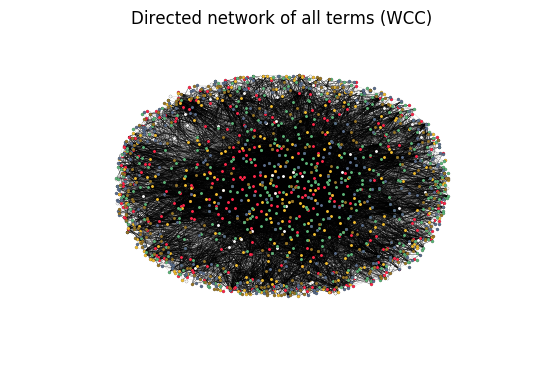

In [18]:
#---------------------------------------- INFORMATION ABOUT THE NETWORK AND PLOT --------------------------------
print "Number of nodes: ", TG_WCC.number_of_nodes()
print "Number of edges: ", TG_WCC.number_of_edges()

colors = ['#fd2749', '#f1bc30', '#f8f8f8', '#5db579', '#5b6e8c', '#987628']

# printing plot
pos=nx.spring_layout(TG_WCC, k=0.6) # positions for all nodes

for i in range(6):
    nx.draw_networkx_nodes(TG_WCC, pos, linewidths=0.1, nodelist=scienceTypes[i], node_color=colors[i], node_size= 5)
    #nx.draw_networkx_nodes(TG_WCC, pos, nodelist=scienceTypes[1], node_color='b', node_size= 5, alpha=0.8)

nx.draw_networkx_edges(TG_WCC,pos,width=0.05)
plot.axis('off')
plot.title("Directed network of all terms (WCC)")
plot.savefig(folderName+"/network_graph_WCC_1.pdf")
plot.savefig(folderWithPlots+"/network_graph_WCC_1_coloured.png") # save as png
plot.show()

Network presented above is indicating with the color of nodes, which node belongs to which branch. It was possible thanks to code, which creates lists of non overlapping terms. In one graph, 1544 nodes are presented, which are linked with 13670 nodes. All together creates a huge black spot. It us caused by the fact that created network is very dense, there is a lot correlation between nodes. Fortunately, from network analysis point of view, it is a good information. Network is very interesting, giving a big chance for some clear conclusions.

<B>IN/OUT DEGREE

In [20]:
inList = getInDegreeList(TG_WCC)
inListSorted = sortDictionaryReversedByValues(inList)

outList = getOutDegreeList(TG_WCC)
outListSorted = sortDictionaryReversedByValues(outList)

In [23]:
print ('\x1b[1;31m'+"In degree list: " + '\x1b[0m')
universalPrintList(inListSorted, 25)
print ""
print ('\x1b[1;31m'+"Out degree list: " + '\x1b[0m')
universalPrintList(outListSorted, 25)

In degree list: 
voltage  -->  129
capacitor  -->  108
nasa  -->  105
energy  -->  104
frequency  -->  100
electron  -->  97
force  -->  96
physics  -->  96
magnetic field  -->  91
electronics  -->  90
alternating current  -->  89
temperature  -->  88
electric field  -->  84
transistor  -->  83
pressure  -->  82
resistor  -->  81
mass  -->  81
transformer  -->  80
diode  -->  76
vacuum tube  -->  75
inductor  -->  73
semiconductor  -->  68
torque  -->  67
internet  -->  67
integrated circuit  -->  67

Out degree list: 
electricity  -->  64
spacecraft propulsion  -->  60
amplifier  -->  59
amplifier#classification of amplifier stages and systems  -->  59
diode#junction diodes  -->  58
diode  -->  58
capacitor  -->  56
electronic component  -->  55
computer  -->  55
machine  -->  53
force  -->  51
classical mechanics  -->  50
fluid dynamics  -->  48
electric_current#conventions  -->  45
electron  -->  44
physics  -->  41
light-emitting diode  -->  39
vacuum tube  -->  39
rocket  -->  39


<B>IN DEGREE DISTRIBUTION

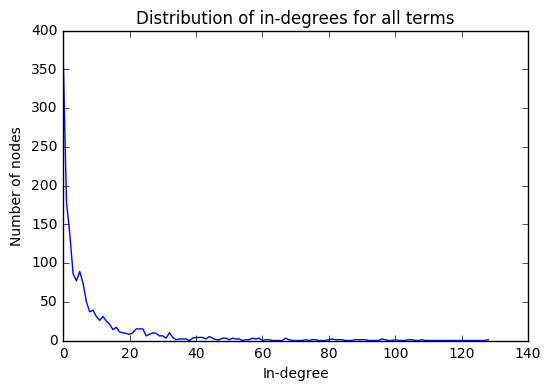

In [58]:
plotDegreeDistribution(inList, "in", "all terms")

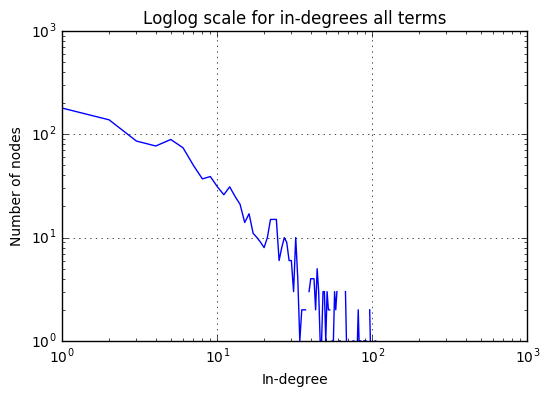

In [24]:
plotLogLogDegreeDistribution(inList, "in", "all terms")

The in-degree of a node is equivalent to how many links point directly to a node. In our situation, it represents how many wikipedia pages have a reference to a page (represented as a node in this network). So if you take a look at our analysis done above when computing the in-degree for the entire network, you can observe that the nodes with the highest id-degree values are in fact the most important science terms in our graph (meaning that other terms are somehow dependent on this high degree terms - e.g. you need "voltage" to generate "oscillations"). The node "voltage" has the highest in-degree value (129) meaning that there are 129 wikipedia pages referencing the "voltage" page. If you think this through it actually makes a lot of sense: voltage is very important concept in all the scientific branches that we have choosen. On the other hand if we take a look at the "oscillation" page which has an in-degree of 25, it is very clear that it is not such an important term for all the branches and it is going to be referenced less by other pages (exactly 25 times).

The plot above represents the distribution of the in-degree for all the nodes in the big network (containing the terms from all 6 branches). The x-axis reprsents the in-degree values, while the y-axis represents the number of nodes. In other words, this plot shows how many nodes has a certain in-degree value: e.g. there are aproximatively 12 nodes with in-degree 20 and if you look at the most right point there is the "voltage" node (just one node) with the in-degree value of 129.

The plot also provide us another important aspect: the in-degree distribution looks like a Power law distribution, which confirms us that the network is corectly built (usually the real networks tend to be Power law distributed). Power law distribution in this case means that when increasing the in-degree value (the x-axis) the number of nodes to have that in-degree value drops exponetially until it meets a treshold value and then begin to stay as a steady line with small spikes. For example you can see that there are 350 nodes with in-degree 1 in our network, ~270 with in-degree 2 and so on. As we aproaches the threshold value (25 in this case) the number of nodes has decreased exponetially to around 22, and then it continues to be constant with smooth variations until the last node ("voltage") which has the value of 129. It makes a lot of sense to be a lot of nodes that are referenced a few times while there are a few nodes that are referenced a huge amount of times.

<B>OUT DEGREE DISTRIBUTION

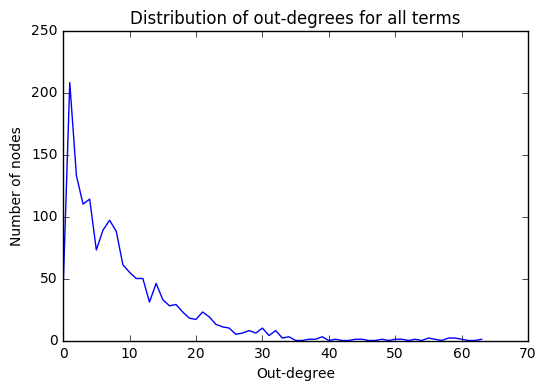

In [59]:
plotDegreeDistribution(outList, "out", "all terms")

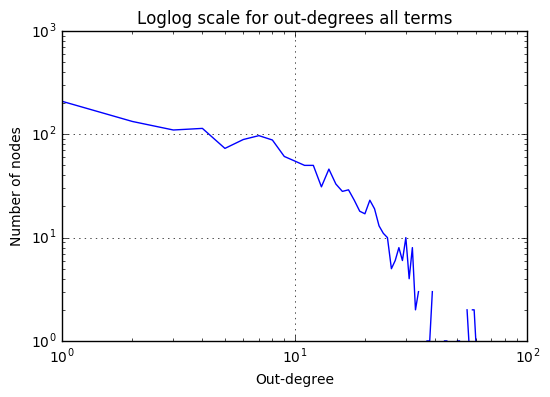

In [25]:
plotLogLogDegreeDistribution(outList, "out", "all terms")

The out-degree of a node is equivalent to how many links the node points directly to. In our situation, it represents how many wikipedia pages (represented as a node in this network), a page reference. If you interpret our analysis our out-degree computation result above, you can observe that the nodes with the highest out-degree values are in fact the terms that depends somehow, are very close related or can be used by to other terms. You can also see this terms as being very generic, so that it reference a lot of other concrete artiles. The node "electricity" has the highest out-degree value (64) meaning that there are 64 wikipedia pages refered by the "electricity" page. If you think this through it actually makes a lot of sense: electricity is very important concept in all the scientific branches that we have choosen and it references a lot of pages like: lightning, static electricity, electromagnetic induction. This page also reference other pages about the effects of the electricity such as heat or electromagnetic fields.

The plot above represents the distribution of the out-degree for all the nodes in the big network (containing the terms from all 6 branches). The x-axis reprsents the out-degree values while the y-axis represents the number of nodes. In other words, this plot shows how many nodes has a certain out-degree value: e.g. if you look at the most right point there is the "electricity" node (just one node) with the out-degree value of 64, amplifier#classification of amplifier stages and systems and amplifier (both with 59 - the small spike just before 60 on the x-axis).

The plot also looks like a Power law distribution, with a little Poisson variation at the very beginning. It can be seen that there are 60 nodes with out-degre 0, 220 nodes with out-degree 1, ~140 with out-degree 2 and so on. As we aproaches the threshold value (30 in this case) the number of nodes has decreased exponetially to around 10, and then it continues to be constant with smooth variations until the last node ("electricity") which has the out value of 64. It makes a lot of sense to be a lot of nodes that reference others a few times while there are a few nodes that reference a huge amount of other nodes/pages.


<B>SCATTER PLOT OF IN/OUT DEGREE

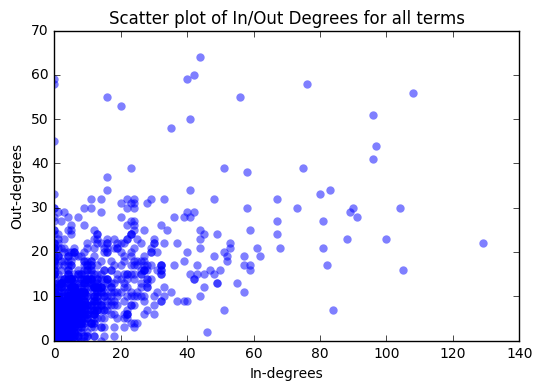

In [64]:
plotScatterInOutDegree(inList, outList, "all terms")

As it can be seen in the scatter plot above, the number of in degrees seems to be close to the out-degrees, which means that the distribution of nodes slightly equal. In other words, for a node with a great in-degree value is another one with a high number of out-degree which compensates. The terms form top 10 in-degree definety appear on the right side of the plot(the sparse values greather that 100 on the x-axys): voltage, capacitor or nasa are on the very right side, voltage beeing the most extreme point with 126 in-degree value. On the other hand, electricity is represented by the very up above point in the plot on the y-axis with a value of 64.


<B>BETWEENNESS CENTRALITY

In [26]:
bcList = computeBetweennessCentrality(TG_WCC)
bcListSorted = sortDictionaryReversedByValues(bcList)

In [27]:
print '\x1b[1;31m' + "BetweennessCentrality ordered list: " + '\x1b[0m' 
universalPrintList(bcListSorted, 25)

BetweennessCentrality list: 
computer  -->  0.046684331503
physics  -->  0.0411605709495
internet  -->  0.0297853307718
electronics  -->  0.0231526926317
capacitor  -->  0.0226543751357
machine  -->  0.021761305989
radio  -->  0.0200100055909
force  -->  0.0195937270695
integrated circuit  -->  0.019475044404
electricity  -->  0.0194660244668
spacecraft propulsion  -->  0.01910286593
nasa  -->  0.0180189044179
electron  -->  0.0179283465296
transistor  -->  0.0175985727828
robotics  -->  0.017543520612
diode  -->  0.0170589146918
aircraft  -->  0.0170231094385
energy  -->  0.0161664535137
technology  -->  0.0160638028381
transformer  -->  0.0154114344267
rocket  -->  0.0152246815294
vacuum tube  -->  0.0146944945105
space shuttle  -->  0.0136590593169
amplifier  -->  0.0130150050947
frequency  -->  0.012746072765


The betweenness centrality of a node represents a score that node receives for being included in the most shortest paths in the graph. A very high level explanation would be how central a node is into the network. Terms with high betweenness centrality in this case, are those which are the most important among all branches. This information might be useful for someone who is trying to learn about a few branches, which are a little bit correlated, at the same time. Concerning each branch seperately, we cannot depend on those values, branches which are outnumbered, will prevail over those less actual numerical. Nevertheless, for Pat, who is the character in the video, this list is perfect to check out how much he still needs to learn to be able to build a rocket.

<B>EIGENVECTOR CENTRALITY

In [29]:
evcList = computeEigenvectorCentrality(TG_WCC)
evcListSorted = sortDictionaryReversedByValues(evcList)

In [30]:
print '\x1b[1;31m'+"Eigen Vector Centrality list: " + '\x1b[0m'
universalPrintList(evcListSorted, 25)

Eigen Vector Centrality list: 
electron  -->  0.247670822987
electric field  -->  0.201358574417
magnetic field  -->  0.199397302083
energy  -->  0.189409390139
physics  -->  0.169905120137
photon  -->  0.153751003446
electric charge  -->  0.149990939483
force  -->  0.144245802496
frequency  -->  0.140467737693
mass  -->  0.138987660757
momentum  -->  0.134968154041
voltage  -->  0.134229778015
atom  -->  0.130964721246
alternating current  -->  0.123951117052
transistor  -->  0.119875617985
electromagnetic radiation  -->  0.118411339523
temperature  -->  0.115708759666
vacuum tube  -->  0.115500219058
si  -->  0.113394999178
volt  -->  0.112522562617
semiconductor  -->  0.111305644419
wavelength  -->  0.110252938627
diode  -->  0.109802636311
capacitor  -->  0.105249657661
light  -->  0.104804122974


The point of the eigenvector centrality is to reward connection to other highly connected nodes. So if you have a node with a few connection but they are all to highly connected nodes, then that node will rank higher than node with more connection all to lowly connected nodes. It is sometimes similar to the betweenness centrality. More about conclusions coming out of Eigen Vector Centarlity will be written on the occassion of analysis of each branch networks, which in turn this measure is more valueable and shows more.

<B> DEGREE ASSORTATIVITY COEFFICIENT

In [36]:
# first we are creating an undirected version of the graph
UTG_WCC = TG_WCC.to_undirected()

In [37]:
computeDegreeAssortativityCoefficient(UTG_WCC)

-0.00060421869572622794

The value of degree assortativity coefficient is smaller the zero, which means that the undirected version of the graph is disassortative, meaning that high-degree nodes does not tend to link with other high degree terms. That in turn means that the network is more robustness (solid), if we will remove one node, than it won't have such a big influence on the whole network.

<font color='green' size = 5 ><b><i>CODE: NETWORK ANALYSIS - ANALYSIS FOR EACH BRANCH (GCC)</i></b></font>

Having analysed the whole network, where all nodes from different branches are included, which in turn results with mixing all terms, we have decided that more meaningful and probably more interesting conclusions can be drawn from ananylisis of each branch separately. For this purpose, six independent subgraphs has been created, each representing the branch. The main goal and expectation is to find out, which terms among whole set are the most important in each branch. Whether network analysis tools enables us to distinguish such list, which in further development of the project can be used for creation of "Learing Path" for the end-user. 

In [41]:
#creating subgraphs for each branch
graphsList = []
for i in range(6):
    tempGraph = TG_WCC.subgraph(scienceTypes[i])
    graphsList.append(tempGraph)

In [42]:
#---------------------------------------- INFORMATION ABOUT NETWORKS --------------------------------
for i in range(6):
    print "Network for " + '\x1b[1;31m' + scienceTypesNames[i]   + '\x1b[0m' 
    print "Number of nodes: ", graphsList[i].number_of_nodes()
    print "Number of edges: ", graphsList[i].number_of_edges()
    print ""

Network for aerospace_list
Number of nodes:  285
Number of edges:  2322

Network for mechanics_list
Number of nodes:  280
Number of edges:  1526

Network for robotics_list
Number of nodes:  78
Number of edges:  170

Network for electronic_list
Number of nodes:  473
Number of edges:  4183

Network for electrical_list
Number of nodes:  324
Number of edges:  911

Network for computer_science_list
Number of nodes:  259
Number of edges:  1008



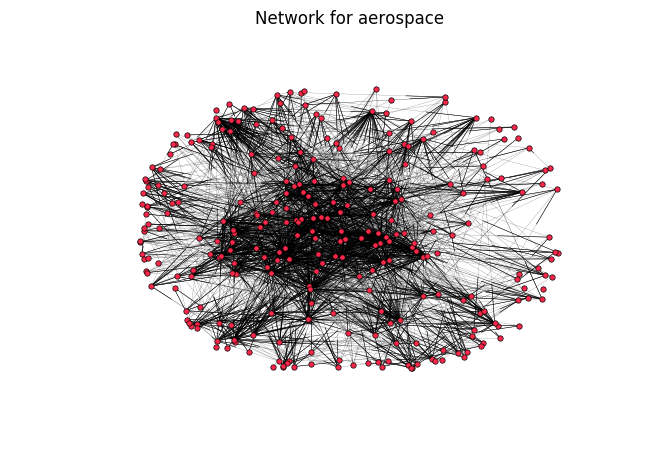

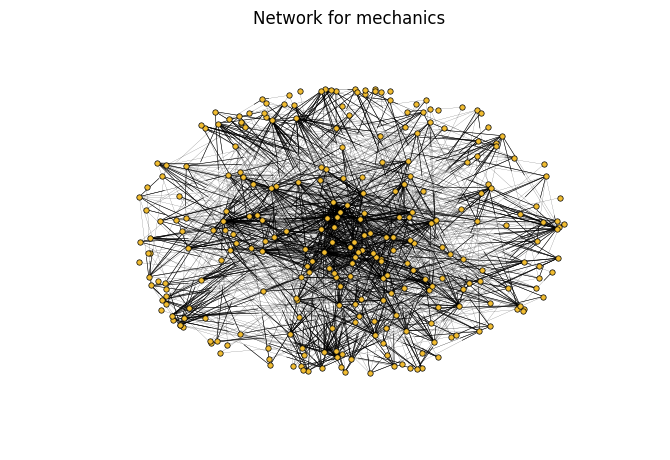

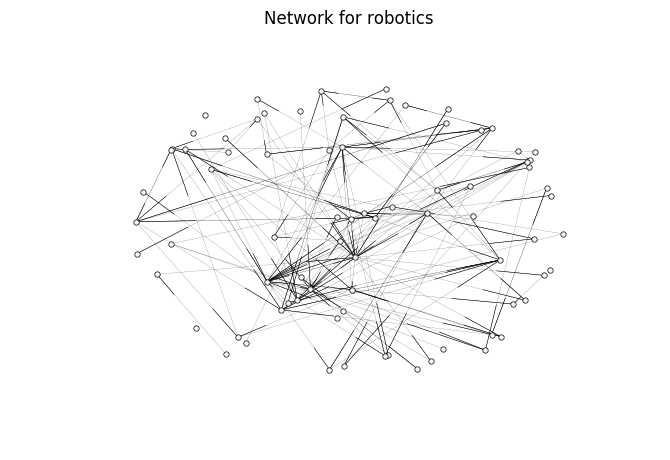

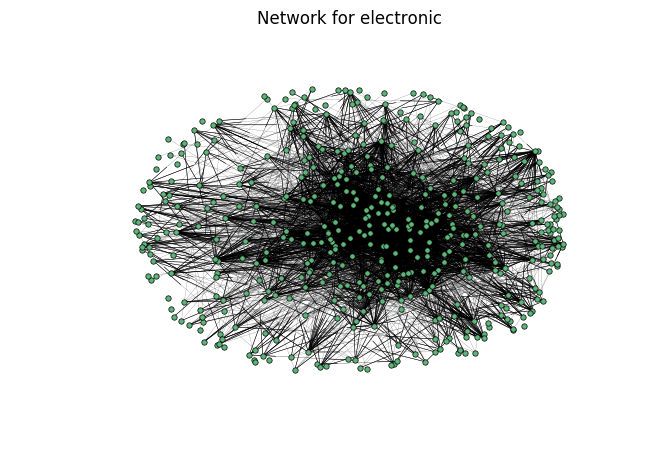

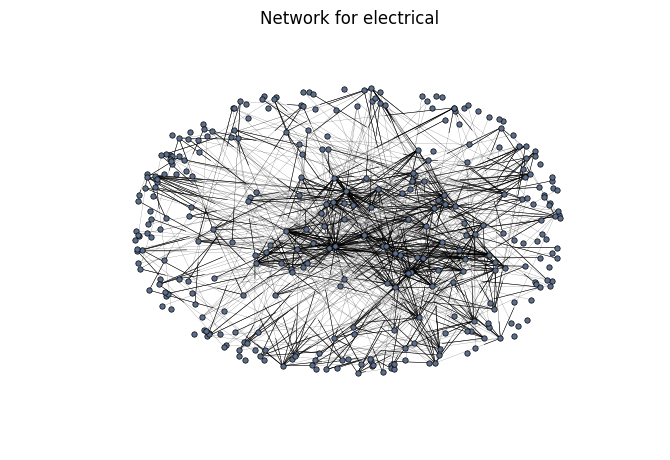

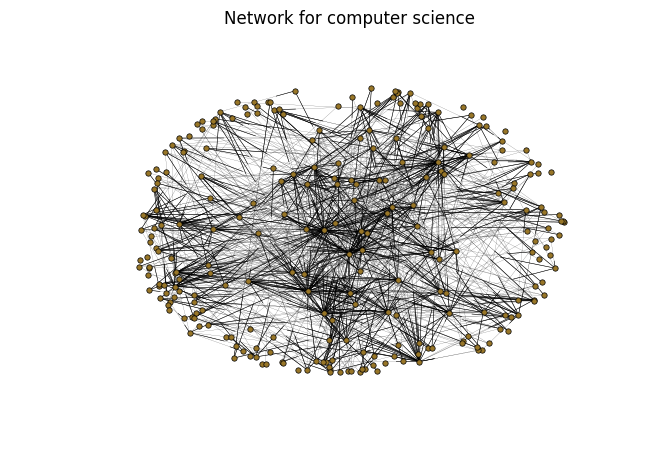

In [43]:
#---------------------------------------- PLOTS OF NETWORKS --------------------------------
for i in range(6):
    plot.figure(i)  
    nx.draw(graphsList[i], pos, node_size = 15, node_color = colors[i], width=0.1, linewidths=0.5)
    plot.title("Network for " + scienceNames[i])
    plot.savefig(folderWithPlots+"/" + scienceTypesNames[i] + ".png")
    plot.show()

<B>IN/OUT DEGREE FOR SIX BRANCHES OF SCIENCE

In [44]:
graphsInList = []
graphsOutList = []
graphsInListSorted = []
graphsOutListSorted = []

for i in range(6):
    inList = getInDegreeList(graphsList[i])
    graphsInList.append(inList)
    inListSorted = sortDictionaryReversedByValues(inList)
    graphsInListSorted.append(inListSorted)
    
    outList = getOutDegreeList(graphsList[i])
    graphsOutList.append(outList)
    outListSorted = sortDictionaryReversedByValues(outList)
    graphsOutListSorted.append(outListSorted)

In [46]:
for i in range(6):    
    print '\x1b[1;31m' + "In degree list for" + '\x1b[0m'  , scienceNames[i]
    universalPrintList(graphsInListSorted[i], 5)
    print '\x1b[1;31m' + "Out degree list for" + '\x1b[0m'  , scienceNames[i]
    universalPrintList(graphsOutListSorted[i], 5)
    print ""

In degree list for aerospace
nasa  -->  69
spacecraft  -->  51
thrust  -->  48
orbit  -->  48
space shuttle  -->  47
Out degree list for aerospace
spacecraft propulsion  -->  56
fluid dynamics  -->  37
rocket  -->  34
aerospace engineering  -->  28
orbital mechanics  -->  27

In degree list for mechanics
force  -->  45
torque  -->  42
energy  -->  40
pressure  -->  36
physics  -->  30
Out degree list for mechanics
machine  -->  35
classical mechanics  -->  21
physics  -->  20
force  -->  18
diesel engine  -->  16

In degree list for robotics
robotics  -->  13
robot  -->  12
nasa  -->  10
actuator  -->  7
artificial intelligence  -->  7
Out degree list for robotics
robotics  -->  14
robot  -->  13
bionics  -->  9
artificial intelligence  -->  7
robot kinematics  -->  7

In degree list for electronic
voltage  -->  95
capacitor  -->  84
frequency  -->  80
electron  -->  70
resistor  -->  68
Out degree list for electronic
amplifier  -->  52
amplifier#classification of amplifier stages and 

UnicodeEncodeError: 'ascii' codec can't encode character u'\u2013' in position 6: ordinal not in range(128)

The idea of in and out degree lists has been described, while creating the network of all terms in the previous section. At this point we would like to mention only the major conclusions coming out of what we see above.

Ananlysing the output coming from in/out degree lists, we can confirm that terms with the highest number of links coming out of the article (out degree), are describing some complicated phenomenas, which are diversed and it is needed to use a lot of different definitions to properly describe such scientific term. To proof our statement, looking into a few examples of the highest out degree in each branch: rocket, orbital mechanics, machine, diesel engine, electricity or transfomers. All those terms are describing very complicated topics, which has to be described in detail.

On the other hand, results coming out of in degree values clearly indicates that, terms which are quated, represents a group of fundamentall definitons for each branch, which are very basic such as: voltage, capacitor, unix, or some physical phenomenas such as frequency, force, mass. All those terms has to be used in other articles to understand their meaning. We would indicate those terms as basic knowledge from which students should start, to understand more complex ideas.

<b>IN DEGREE DISTRIBUTION FOR SIX BRANCHES OF SCIENCE

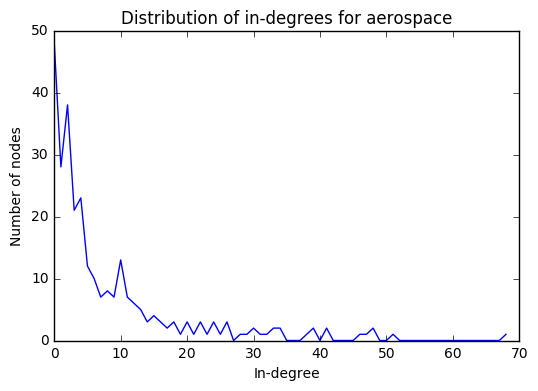

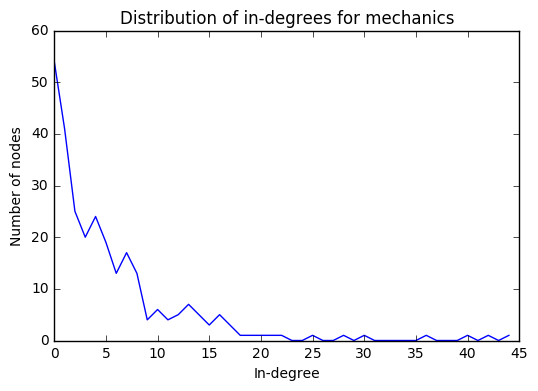

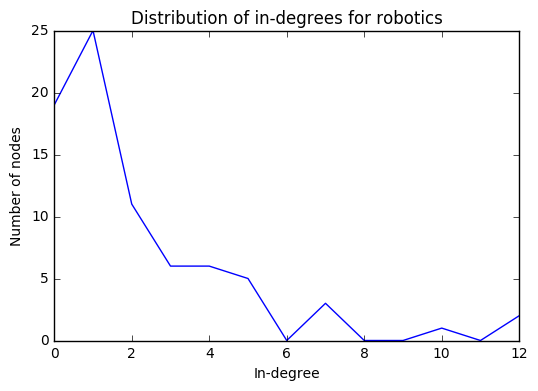

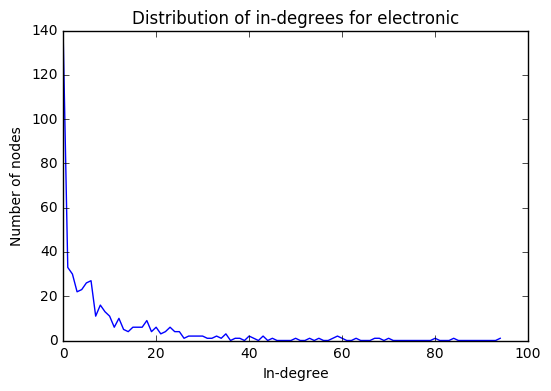

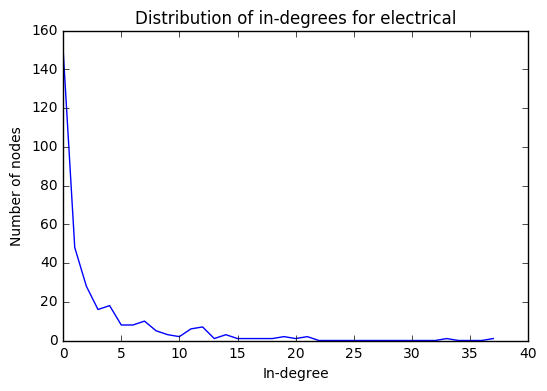

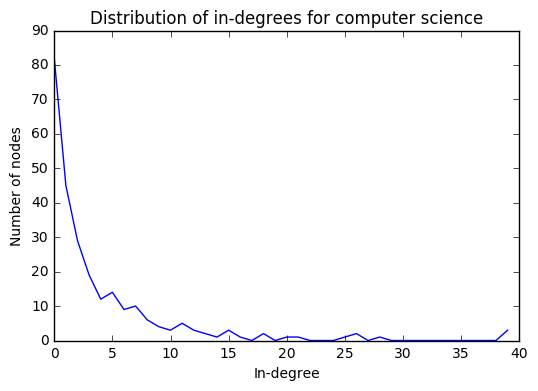

In [71]:
for i in range(6):
    plotDegreeDistribution(graphsInList[i], "in", scienceNames[i])

<b>OUT DEGREE DISTRIBUTION FOR SIX BRANCHES OF SCIENCE

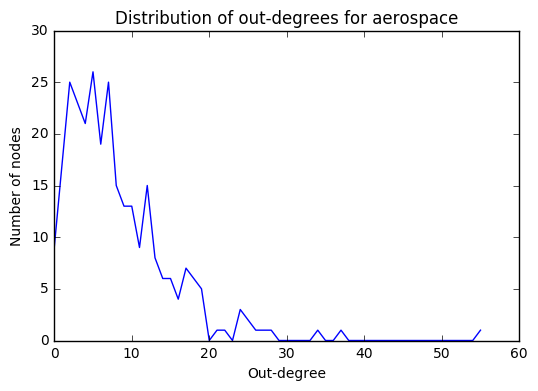

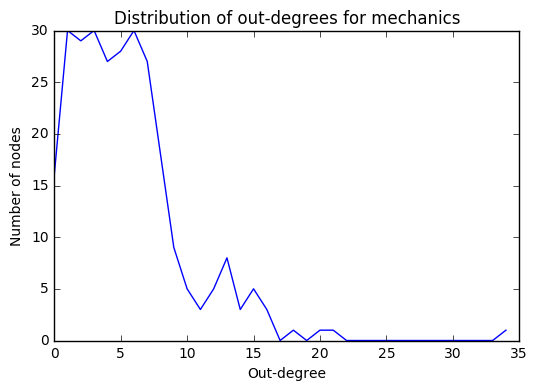

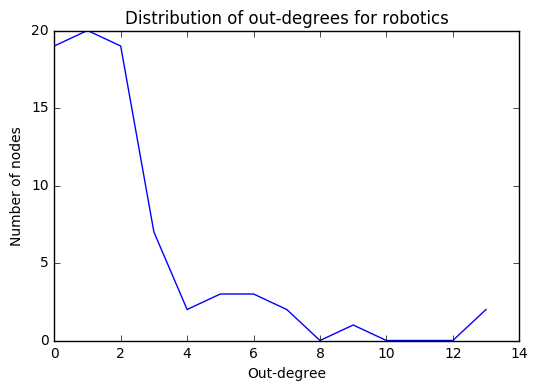

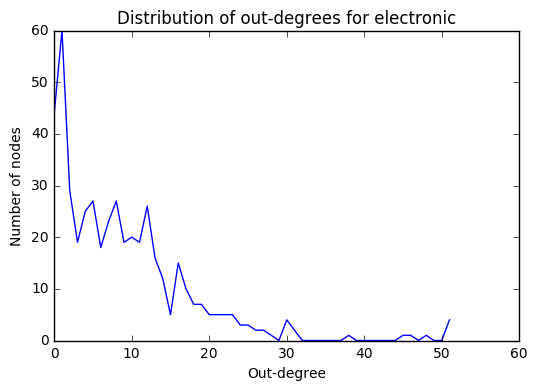

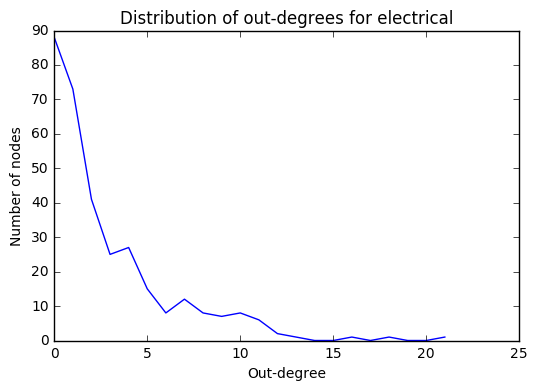

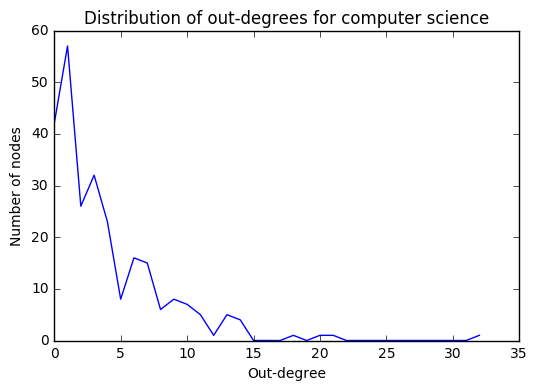

In [72]:
for i in range(6):
    plotDegreeDistribution(graphsOutList[i], "out", scienceNames[i])

Degree distribution plots for each branch seperately does not look so impressive and smooth as one presented for the whole network. It is caused by the fact that networks for each branch are around six times smaller, as a result curves cannot be so smooth. Nevertheless, it can be stated that each branch of science is showing features of real network as it was in case of all terms network. The Degree Distribution of in links and out links are following the power law, which is the main indicator whether the network behaves as real.

Since the size of six analysed networks aren't too big, we have decided to present degree distribution only in standard scale, neglecting logaritmic scale.

<B>BETWEENNESS CENTRALITY FOR SIX BRANCHES OF SCIENCE

In [47]:
graphsBcList = []
graphsBcListSorted = []
    
for i in range(6):
    bcList = computeBetweennessCentrality(graphsList[i])
    graphsBcList.append(bcList)
    bcListSorted = sortDictionaryReversedByValues(bcList)
    graphsBcListSorted.append(bcListSorted)

In [48]:
for i in range(6):
    print "Betweenness Centrality list for " + '\x1b[1;31m' + scienceNames[i]+ '\x1b[0m' +":"
    universalPrintList(graphsBcListSorted[i], 5)
    print ""

Betweenness Centrality list for aerospace:
spacecraft propulsion  -->  0.122248050692
rocket  -->  0.0978870106259
spacecraft  -->  0.06122045397
aircraft  -->  0.0551488173429
nasa  -->  0.0550547995343

Betweenness Centrality list for mechanics:
physics  -->  0.083388284124
machine  -->  0.0754632369952
energy  -->  0.0731007482417
force  -->  0.0710840018244
computer  -->  0.0517706498139

Betweenness Centrality list for robotics:
robotics  -->  0.20538688072
robot  -->  0.131947526727
industrial robot  -->  0.0948989948306
actuator  -->  0.0750781173714
servomechanism  -->  0.0547118608209

Betweenness Centrality list for electronic:
capacitor  -->  0.0567394758926
diode  -->  0.0560987052183
amplifier  -->  0.0427300071633
electron  -->  0.0323065961507
vacuum tube  -->  0.0296981448272

Betweenness Centrality list for electrical:
alternating current  -->  0.0579224137164
coaxial cable  -->  0.0572082768761
wi-fi  -->  0.0498407939646
transformer  -->  0.0393876462936
energy  --> 

Betweenness centrality indicates the centrality of a node (term) in the network. It is equal to the number of shortest paths from all nodes to all others that pass through that node. Terms with a high betweenness centrality probably act as a intermediary definitions, which are necessary to understand other definitions, which boosts the communication (links) between other terms. It is pretty obvious that the most common terms are crucial for the whole field of the science.

Results, which are presented above, confirm that Betweenness Centrality is one of the best tools to indicate the most importatnt nodes in the network. In our case, where nodes are represented by terms, this measures shows terms, which cannot be avoided during learning process about the specific field of science. For sure, to understand mechanics we need to know what is physics about, energy or force. We cannot imagine aerospace without rocket, nasa or spacecraft. What is more, it has been noticed that Betweeness Centrality points out more general ideas in each branch, some pehnomenas, lets say, it goes on a 'higher' level. In a little bit different way behaves an Eigenvector Centrality, which is going to be presented belowe.

<B>EIGENVECTOR CENTRALITY FOR SIX BRANCHES OF SCIENCE

In [49]:
graphsEvcList = []
graphsEvcListSorted = []

for i in range(6):
    evcList = computeEigenvectorCentrality(graphsList[i])
    graphsEvcList.append(evcList)
    evcListSorted = sortDictionaryReversedByValues(evcList)
    graphsEvcListSorted.append(evcListSorted)

In [50]:
for i in range(6):
    print "Eigen Vector Centrality list for " + '\x1b[1;31m' + scienceNames[i]+ '\x1b[0m' +":"
    universalPrintList(graphsEvcListSorted[i], 5)
    print ""

Eigen Vector Centrality list for aerospace:
mass  -->  0.28430725396
force  -->  0.245622562735
orbit  -->  0.223719098358
physics  -->  0.209929608013
momentum  -->  0.204945213726

Eigen Vector Centrality list for mechanics:
force  -->  0.347984441503
energy  -->  0.312200024956
torque  -->  0.277726128202
friction  -->  0.268744823737
physics  -->  0.236567118457

Eigen Vector Centrality list for robotics:
robot  -->  0.351949564566
artificial intelligence  -->  0.347924237928
robotics  -->  0.325876440308
nasa  -->  0.316929003611
three laws of robotics  -->  0.267558648265

Eigen Vector Centrality list for electronic:
electron  -->  0.298823966545
electric field  -->  0.241887972368
magnetic field  -->  0.223635603627
voltage  -->  0.194423016437
frequency  -->  0.179134613044

Eigen Vector Centrality list for electrical:
volt  -->  0.341161829237
joule  -->  0.298840711105
coulomb  -->  0.284794596614
ampere  -->  0.261626716124
watt  -->  0.252711209829

Eigen Vector Centrality 

Eigenvector centrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. It computes the most important concepts into a field of science. On the other hand, the betweeness centrality returns the most important term within the concepts. Think about this: the concepts are usually connected with other concepts (high connected nodes) because they are general notions and are found in many concrete terms (this is why the high connectivity). The key terms returned by the betweenness centrality represents concrete facts/implementations of the concepts, but can not be so much connected because they are particular terms (find within a concept). For example: eigenvector centrality returned pages like: momentum, semiconductor, mass, force, energy which are general concepts and are based on particular facts/implementations like the ones returned by the betweenness centrality: capacitor, transistor, computer, atom.

We found out that this tools are right for our application idea: we are able to return the most central/important terms within a branch/network, providing the user of our application with the most important terms to be learned when trying to master a new subject. We consider that in order to learn a new topic, you have to start with the most important, central terminologies and then if you want to get more in depth you can explore the more particular concepts, that are not located into the center of the network.

<b> Degree Assortativity Coefficient

In [54]:
# first we are creating an undirected version of the graph
undirectedGraphsList = []
for i in range(6):   
    UTG_WCC = graphsList[i].to_undirected()
    undirectedGraphsList.append(UTG_WCC)

In [55]:
graphsAssCoList = [] 
for i in range(6):
    temp = computeDegreeAssortativityCoefficient(undirectedGraphsList[i])
    graphsAssCoList.append(temp)

In [56]:
for i in range(6):    
    print "Degree assortativity coefficient for " + scienceNames[i] +":"
    print graphsAssCoList[i]
    print ""

Degree assortativity coefficient for aerospace:
-0.162309942234

Degree assortativity coefficient for mechanics:
0.0301436574251

Degree assortativity coefficient for robotics:
-0.211840890442

Degree assortativity coefficient for electronic:
-0.0791877918972

Degree assortativity coefficient for electrical:
-0.0203219919219

Degree assortativity coefficient for computer science:
-0.0917242306792



Analysis of measures coming from Degree Assortativity Coefficient for each branch follow the same pattern as value obtained in case of network for all terms.  values are smaller then zero, which means that the undirected version of the graph is disassortative, meaning that high-degree nodes does not tend to link with other high degree terms.

<font color='green' size = 5 ><b><i>CODE: COMMUNITY DETECTION</i></b></font>

<i>(restart kernel first)</i>

The next stage in the development of the project, was to verify whether used division into six branches is the appropriate one. To satisfy this task, Louvain method for community detection, was used. Operations are performed on the GCC, which was calculated before.

In [4]:
#----------------------------------- READ LISTS FROM FILES (folder 'terms_lists_wcc') ---------------------------------------------
for i in range(7):
    f = io.open(folderName +'/' +'terms_lists_wcc/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)
#     print scienceTypesNames[i], ": ", len(tempList)

In [5]:
#--------------------------------------------- ADDING NODES TO THE NETWORK --------------------------------------
all_terms_list = scienceTypes[6]
TG_WCC=nx.DiGraph()
TG_WCC.add_nodes_from(all_terms_list)

In [6]:
#------------------------------------- ADDING EDGES TO NODES, AFTER TEXT ANALYSIS -------------------------------
for i in range(len(all_terms_list)):
    term = all_terms_list[i]
    term_string = io.open(folderName +'/' +'terms/'+term, 'r', encoding='utf-8')
    term_list = re.findall(r'\[\[(.*?)\]\]', term_string.read().lower())
    
    termRemove = []
    
    #removing all unnecessary terms
    for element in term_list:
        if not (element in all_terms_list):
            termRemove.append(element)
            
    for element in termRemove:
        term_list.remove(element)
        
    for element in term_list:
        TG_WCC.add_edge(term,element)

Number of nodes:  1544
Number of edges:  13670


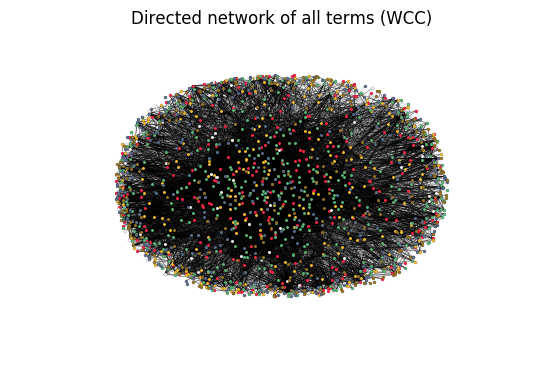

In [7]:
#---------------------------------------- INFORMATION ABOUT THE NETWORK AND PLOT --------------------------------
print "Number of nodes: ", TG_WCC.number_of_nodes()
print "Number of edges: ", TG_WCC.number_of_edges()

colors = ['#fd2749', '#f1bc30', '#f8f8f8', '#5db579', '#5b6e8c', '#987628', '#c57085', '#003815']

# printing plot
pos=nx.spring_layout(TG_WCC, k=0.6) # positions for all nodes

for i in range(6):
    nx.draw_networkx_nodes(TG_WCC, pos, linewidths=0.1, nodelist=scienceTypes[i], node_color=colors[i], node_size= 5)
    #nx.draw_networkx_nodes(TG_WCC, pos, nodelist=scienceTypes[1], node_color='b', node_size= 5, alpha=0.8)

nx.draw_networkx_edges(TG_WCC,pos,width=0.05)
plot.axis('off')
plot.title("Directed network of all terms (WCC)")
plot.savefig(folderName+"/network_graph_WCC_1.pdf")
plot.savefig(folderName+"/network_graph_WCC_1.png") # save as png
plot.show()

In [8]:
#-------------------------- CALCULATING MODULARITY OF THE NETWORK WITH INDICATED 6 BRANCHES ---------------------------

# firstly, read branches list without overlapping (prepared before)
aerospace_branch = []
mechanics_branch = []
robotics_branch = []
electronic_branch = []
electrical_branch = []
computer_science_branch = []

scienceBranches = [aerospace_branch, mechanics_branch,  robotics_branch, electronic_branch, electrical_branch, computer_science_branch]
scienceBranchesNames = ["aerospace_branch", "mechanics_branch",  "robotics_branch", "electronic_branch", "electrical_branch", "computer_science_branch"]

for i in range(6):
    f = io.open(folderName +'/' +'terms_lists_wcc_without_overlapping/'+scienceBranchesNames[i]+'.txt', 'r', encoding = 'utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceBranches[i].append(element)


In [9]:
n_c = 6
L = TG_WCC.number_of_edges()
N = TG_WCC.number_of_nodes()

print "Number of nodes, N: ", N 
print "Number of links, L: ", L
print "Partition into n_c communities, n_c: ", n_c

Number of nodes, N:  1544
Number of links, L:  13670
Partition into n_c communities, n_c:  6


In [10]:
#creating subgraphs to get number of links inside communities, called l_c   
TG_WCC_aeros = TG_WCC.subgraph(aerospace_branch)
TG_WCC_mecha = TG_WCC.subgraph(mechanics_branch)
TG_WCC_robot = TG_WCC.subgraph(robotics_branch)
TG_WCC_elect = TG_WCC.subgraph(electronic_branch)
TG_WCC_electri = TG_WCC.subgraph(electrical_branch)
TG_WCC_compu = TG_WCC.subgraph(computer_science_branch)

list_L_c = []
list_L_c.append(TG_WCC_aeros.number_of_edges())
list_L_c.append(TG_WCC_mecha.number_of_edges())
list_L_c.append(TG_WCC_robot.number_of_edges())
list_L_c.append(TG_WCC_elect.number_of_edges())
list_L_c.append(TG_WCC_electri.number_of_edges())
list_L_c.append(TG_WCC_compu.number_of_edges())

In [11]:
# k_c is the total degree of the nodes in this community
list_k_c = []
for i in range(6):
    degreeDict = TG_WCC.degree(scienceBranches[i])
    k_c = 0
    for key in degreeDict:
        k_c = k_c+ degreeDict[key]
    list_k_c.append(k_c)   

In [12]:
# calculating seperate modularity for each community
modularityList = []

for i in range(n_c):
    M = (list_L_c[i]/L) - math.pow(list_k_c[i]/(2*L), 2)
    modularityList.append(M)

# calculating modularity the whole network
modularity = 0.0
for element in modularityList:
    modularity = modularity + element

print ("The modularity value for the whole network is %.2f" % modularity)

The modularity value for the whole network is 0.39


In [13]:
# -------------------------- PYTHON LOUVAIN = ALGORITHM IMPLEMENTATION TO FIND COMMUNITIES --------------------------
# creating an undirected version of the graph
UTG_WCC = TG_WCC.to_undirected()

# computing the best partition 
partition = community.best_partition(UTG_WCC)
print "Modularity with Louvain algorithm =", community.modularity(partition, UTG_WCC),
print (", while the modularity for manually indicated brnaches was  %.2f" % modularity),
print "."


Modularity with Louvain algorithm = 0.485328752013 , while the modularity for manually indicated brnaches was  0.39 .


Number of communities found by Louvain algorithm: 7.0


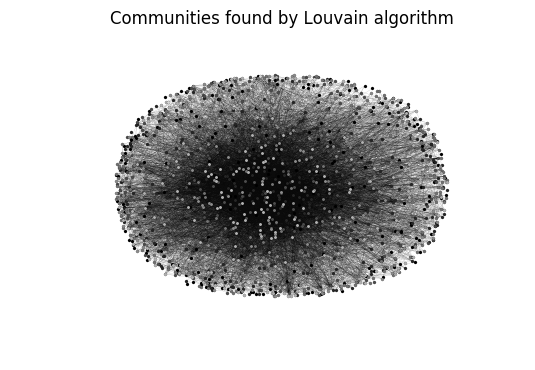

In [14]:
# drawing of communities
size = float(len(set(partition.values())))
print "Number of communities found by Louvain algorithm:", size
count = 0
colors_grey = ['#000000', '#262626', '#4c4c4c', '#737373', '#8c8c8c', '#b2b2b2', '#d8d8d8', '#ffffff']
i = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(
        UTG_WCC, 
        pos, 
        list_nodes, 
        node_size=5, 
        linewidths=0.1,
        node_color=colors_grey[i]
    )
    i = i+1
nx.draw_networkx_edges(UTG_WCC, pos, width=0.05)
plot.title("Communities found by Louvain algorithm")
plot.axis('off')
plot.savefig(folderName+"/communities_louvain_wcc.pdf")
plot.show()

Modularity for the network which was created form term retrieved from glossaries downloaded from the web, which in result influenced on the division in branches, is 0.39. This value is quit high, which indicates that the division is fince. Nevertheless, to check whether it could be done better, a Louvain Algorithm has beed used. After some calculations, Louvain method has indicated 7 branches, which is very similar to what we have introduced (6 branches). The Modalrity value for new communities is 0.49, which is higher, suggesting that new division should be better. To actually verify it, next section has been written.

<font color='green' size = 5 ><b><i>CODE: COMMUNITY DETECTION VERIFICATION</i></b></font>

The written below code is comparing the communities found by the Louvain algorithm with the branches of science by creating a matrix D with dimension (B times C), where B is the number of branches and C is the number of communities. We set entry D(i,j) to be the number of nodes that branch i has in common with community j. The matrix D is what we call a confusion matrix. We will use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of science.

In [15]:
#---------------- SAVING NAMES OF TERMS TO LISTS AS COMMUNITIES INDICATES ---------------------
communitiesList = []
commNumber = len(set(partition.values()))
#print commNumber
#print type(partition)
for i in range (commNumber):
    tempList = []
    for element in partition:
        if partition[element] == i:
            tempList.append(element)
    communitiesList.append(tempList)

In [16]:
#number of branches
B = 6
#number of communities
C = len(set(partition.values()))

col = C
row = B

# confussion matrix
D = np.zeros((B, C))

for b in range(B):
    branchList = scienceBranches[b]
    for c in range(C):
        communityList = communitiesList[c]
        numInCommon = len(set(branchList).intersection(communityList))
        D[b,c] = numInCommon
print D

[[   5.    6.    4.    1.  202.   62.    0.]
 [ 117.    8.   14.   27.    7.   86.    0.]
 [  47.    2.    1.    2.    7.    7.    0.]
 [  13.  251.  120.   24.    5.   36.    1.]
 [  26.   47.   77.   56.    7.   32.    1.]
 [  13.   13.    3.  199.    4.    8.    3.]]


After some manual calculations it is concluded that the Louvin algorithm, although it has found 7 communities, which is almost the same amount as branches, it wasn't very accurate, the accuracy is around (202+86+47+251+77+199)/1544=0.56, which is around 56%. As a result, branches indicated by us are more intuitive and are giving better results.

<font color='green' size = 5 ><b><i>CODE: COMMUNITY DETECTION IN EACH BRANCH</i></b></font>

For increasing the accuracy of our learning path mechanism, we are not returning just the most central component within a network. Instead, we furtherly divide the network into communities using the Louvain partition algorithm from the community library. We want to achieve a high granulation of the terms, and then return the most central nodes within the small communities. This approach helps us provide a more accurate result and return very important terms from a field of science that are in the meantime not very related to each other. For a better understanding, please check out the diagram bellow. After partitioning the terms form all the branch into small communities we return the most central terms, drawn with the light green. Please note that this example is made on purpose to be very simplistic and intuitive.

<img src="learningPath.png" width="542">

In [4]:
#----------------------------------- READ LISTS FROM FILES (folder 'terms_lists_wcc') ---------------------------------------------
for i in range(7):
    f = io.open(folderName +'/' +'terms_lists_wcc/'+scienceTypesNames[i]+'.txt', 'r', encoding='utf-8')
    lines = f.readlines()
    tempList = []
    tempList = [e.strip() for e in lines]
    for element in tempList:
        scienceTypes[i].append(element)

In [5]:
#--------------------------------------------- ADDING NODES TO THE NETWORK --------------------------------------
all_terms_list = scienceTypes[6]
TG_WCC=nx.DiGraph()
TG_WCC.add_nodes_from(all_terms_list)

In [6]:
#------------------------------------- ADDING EDGES TO NODES, AFTER TEXT ANALYSIS -------------------------------
for i in range(len(all_terms_list)):
    term = all_terms_list[i]
    term_string = io.open(folderName +'/' +'terms/'+term, 'r', encoding='utf-8')
    term_list = re.findall(r'\[\[(.*?)\]\]', term_string.read().lower())
    
    termRemove = []
    
    #removing all unnecessary terms
    for element in term_list:
        if not (element in all_terms_list):
            termRemove.append(element)
            
    for element in termRemove:
        term_list.remove(element)
        
    for element in term_list:
        TG_WCC.add_edge(term,element)

Number of nodes:  1544
Number of edges:  13670


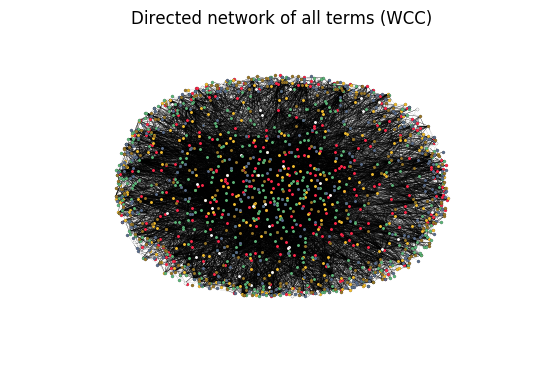

In [7]:
#---------------------------------------- INFORMATION ABOUT THE NETWORK AND PLOT --------------------------------
print "Number of nodes: ", TG_WCC.number_of_nodes()
print "Number of edges: ", TG_WCC.number_of_edges()

colors = ['#fd2749', '#f1bc30', '#f8f8f8', '#5db579', '#5b6e8c', '#987628', '#c57085', '#003815']

# printing plot
pos=nx.spring_layout(TG_WCC, k=0.6) # positions for all nodes

for i in range(6):
    nx.draw_networkx_nodes(TG_WCC, pos, linewidths=0.1, nodelist=scienceTypes[i], node_color=colors[i], node_size= 5)
    #nx.draw_networkx_nodes(TG_WCC, pos, nodelist=scienceTypes[1], node_color='b', node_size= 5, alpha=0.8)

nx.draw_networkx_edges(TG_WCC,pos,width=0.05)
plot.axis('off')
plot.title("Directed network of all terms (WCC)")
plot.savefig(folderName+"/network_graph_WCC_1.pdf")
plot.savefig(folderName+"/network_graph_WCC_1.png") # save as png
plot.show()

In [22]:
# ------------------------------- CREATING SUBGRAPHS FOR EACH BRANCH AND TRANSORMING TO GCC! -------------------------------
graphsList = []
for i in range(6):
    tempGraph = TG_WCC.subgraph(scienceTypes[i])
    graphsList.append(tempGraph)

In [23]:
# ------------------ PYTHON LOUVAIN ALGORITHM IMPLEMENTATION TO FIND COMMUNITIES IN EACH BRANCH --------------------------
# -------------------- CREATING UNDIRECTED SUBGRAPHS FOR EACH BRANCH AND TRANSORMING TO GCC! ------------------------
graphsList = []
for i in range(6):
    tempGraph = TG_WCC.subgraph(scienceTypes[i])
    # weakly connected components as subgraphs
    tempGraph_sub = sorted(nx.weakly_connected_component_subgraphs(tempGraph), key=len, reverse=True)
    # extract biggest
    tempGraph_WCC = tempGraph_sub[0]
    graphsList.append(tempGraph_WCC)
    
    
undirected_graphsList = []    
for i in range(6):
    tempGraph = graphsList[i].to_undirected()
    undirected_graphsList.append(tempGraph)    


# computing the best partition 
partitionsList = []

print "Modularity with Louvain algorithm: "

for i in range(6):
    partition = community.best_partition(undirected_graphsList[i])
    partitionsList.append(partition)
    print '\x1b[1;31m' + scienceTypesNames[i] + '\x1b[0m' 
    print "- Number of partitions: ", len(set(partition.values())), 
    print ", modularity: ", community.modularity(partition, undirected_graphsList[i])


Modularity with Louvain algorithm: 
aerospace_list
- Number of partitions:  5 , modularity:  0.412918206339
mechanics_list
- Number of partitions:  7 , modularity:  0.440370771727
robotics_list
- Number of partitions:  6 , modularity:  0.492238643126
electronic_list
- Number of partitions:  8 , modularity:  0.332989435915
electrical_list
- Number of partitions:  7 , modularity:  0.506431380708
computer_science_list
- Number of partitions:  8 , modularity:  0.418036920623


Number of communities found by Louvain algorithm: 5.0


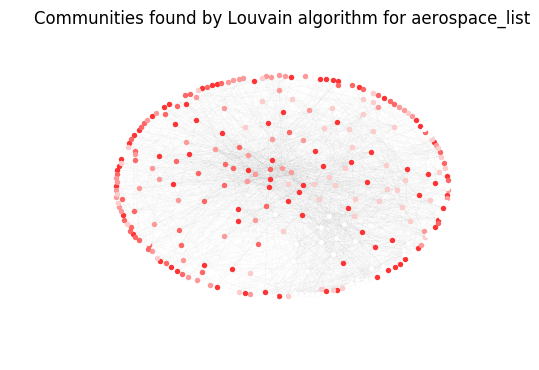

Number of communities found by Louvain algorithm: 7.0


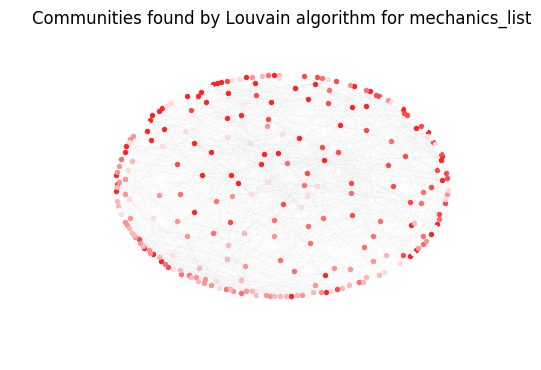

Number of communities found by Louvain algorithm: 6.0


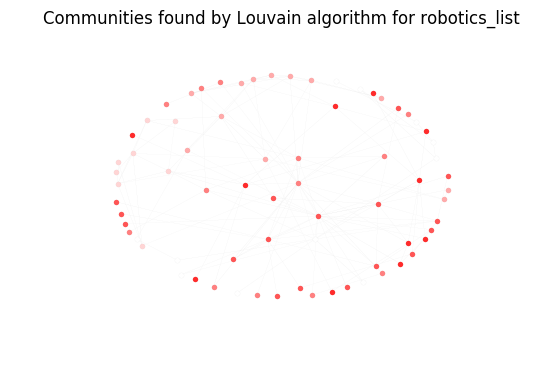

Number of communities found by Louvain algorithm: 8.0


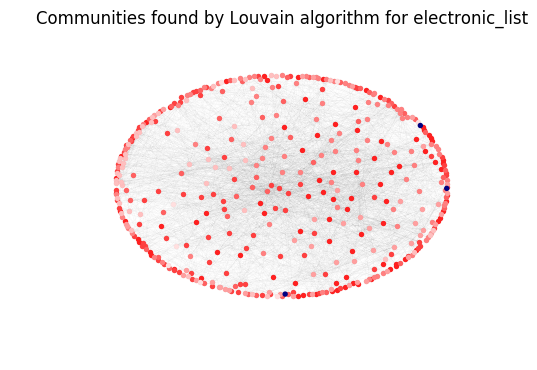

Number of communities found by Louvain algorithm: 7.0


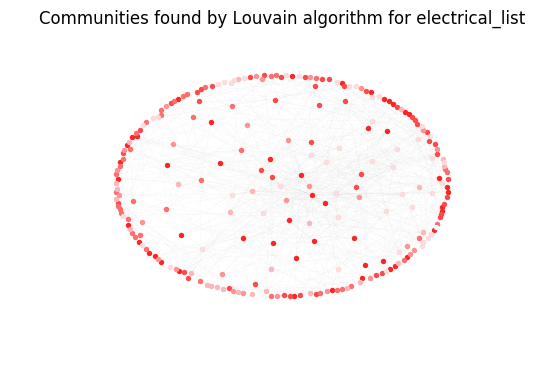

Number of communities found by Louvain algorithm: 8.0


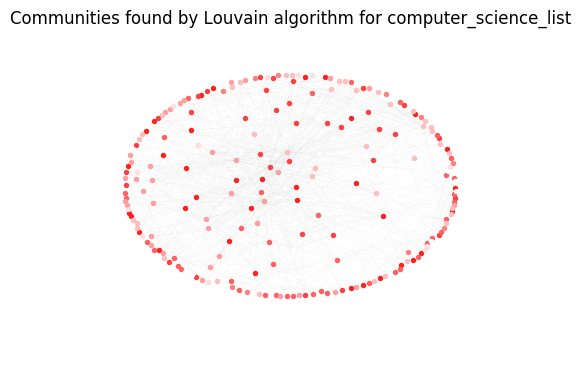

In [24]:
# ---------------------- drawing little communities for each branch ----------------------
for i in range(6):
    size = float(len(set(partitionsList[i].values())))
    print "Number of communities found by Louvain algorithm:", size
    pos=nx.spring_layout(undirected_graphsList[i], k=0.2) # positions for all nodes
    count = 0
    for com in set(partitionsList[i].values()):
        count = count + 1.
        list_nodes = [nodes for nodes in partitionsList[i].keys() if partitionsList[i][nodes] == com]
        nx.draw_networkx_nodes(
            undirected_graphsList[i], 
            pos, 
            list_nodes, 
            node_size=15, 
            linewidths=0.01,
            #rgb float tuple to add color to differentiate communities
            node_color=(1.0, count / size, count / size)
        )
    nx.draw_networkx_edges(undirected_graphsList[i], pos, width=0.01, edge_color='black')
    plot.title("Communities found by Louvain algorithm for " + scienceTypesNames[i])
    plot.axis('off')
    plot.savefig(folderName+"/communities_" + scienceTypesNames[i] + ".pdf")
    plot.show()


<font color='green' size = 5 ><b><i>CODE: CALCULATING BETWEENNESS CENTRALITY FOR SUB-COMMUNITIES</i></b></font>

In [62]:
#------- RETRIEVIENG LIST OF TERMS FOR EACH COMMUNITY IN COMPUTER SCIENCE AND CALCULATING BETWEENESS CENTRALITY ----------
communities_in_branches = {}
top_bc_in_communities = {}
for k in range(6):
    communities_in_branches[scienceTypesNames[k]] = {}
    top_bc_in_communities[scienceTypesNames[k]] = {}
    communitiesList = []
    commNumber = len(set(partitionsList[k].values()))
    print "Number of communities in", scienceTypesNames[k], "is", commNumber

    for i in range (commNumber):
        communities_in_branches[scienceTypesNames[k]][i]=[]
        top_bc_in_communities[scienceTypesNames[k]][i]={}
        tempList = []
        tempSet = set()
        for element in partitionsList[k]:
            if partitionsList[k][element] == i:
                tempList.append(element)
                tempSet.add(element)
        communitiesList.append(tempSet)
        communities_in_branches[scienceTypesNames[k]][i].extend(tempList)        
        tempGraph = undirected_graphsList[k].subgraph(tempList)        
        bcList = computeBetweennessCentrality(tempGraph)
        bcListSorted = sortDictionaryReversedByValues(bcList)
        term_ammount_by_community_size = int(2+len(tempList)*0.07)
        top_bc_in_communities[scienceTypesNames[k]][i] = bcListSorted[0:term_ammount_by_community_size]

Number of communities in aerospace_list is 5
Number of communities in mechanics_list is 7
Number of communities in robotics_list is 6
Number of communities in electronic_list is 8
Number of communities in electrical_list is 7
Number of communities in computer_science_list is 8


In [63]:
community_bc = {}
for b in top_bc_in_communities:
    community_bc[b] = {}
    for c in top_bc_in_communities[b]:
        community_bc[b][c] = {}
        iterator = 0
        for t in top_bc_in_communities[b][c]:
            #community_bc[b][c][t] = {}            
            #print t, TG_WCC.in_degree(tempp[iterator])
            community_bc[b][c][t[0]]=TG_WCC.out_degree(t[0])
            iterator+=1
            #print top_bc_in_communities[b][c][t].append(TG_WCC.in_degree(t[0]))

sorted_community_bc = {}

for b in community_bc:
    sorted_community_bc[b] = {}
    for c in community_bc[b]:
        sorted_community_bc[b][c] = sorted(community_bc[b][c].items(), key=operator.itemgetter(1))

In [64]:
for a in sorted_community_bc:
    print a
    print ''
    for  b in sorted_community_bc[a]:

        print 'community number:', b
        print 'total terms in community:',len(communities_in_branches[a][b])
        print 'top betweeness centrality terms:'
        print ''
        for c in sorted_community_bc[a][b]:
            print c[0]+',',
        print '\n'   

mechanics_list

community number: 0
total terms in community: 61
top betweeness centrality terms:

shear stress, young's modulus, bending, hooke's law, physics, force, 

community number: 1
total terms in community: 39
top betweeness centrality terms:

pump, turbine, diesel engine, gas compressor, 

community number: 2
total terms in community: 32
top betweeness centrality terms:

mechanical advantage, simple machine, wheel, gear, 

community number: 3
total terms in community: 41
top betweeness centrality terms:

reverse engineering, product lifecycle, industrial engineering, robotics, 

community number: 4
total terms in community: 34
top betweeness centrality terms:

microelectromechanical systems, electronics, integrated circuit, computer, 

community number: 5
total terms in community: 33
top betweeness centrality terms:

thermodynamics, pressure, heat transfer, energy, 

community number: 6
total terms in community: 33
top betweeness centrality terms:

fatigue (material), leaf sp

A pattern can be observed from above results that the communties group together related topics (e.g. email, world wide web, database, internet). This is what was hoped since this creates a way to identify subtopics within the branch. It provides a set of articles that can be read and will also relate to eachother.

Only the terms with highest betweeness centrality has been printet as they are identified as the most crucial and essential articles in the community. The printet terms from betweeness has further been sorted by the lowest amount of outgoing degree. This will then be used as a learning path for users for learning about the community topics. The logic is that if a terms has few outgoing links it is less dependt on understanding other terms first and can therefore be a good starting point for learning.

<font color='green' size = 5 ><b><i>CODE: LANGUAGE PROCESSING</i></b></font>

All the wikipedia articles for each branch in the network was downloaded. In each branch there was around 700.000 words which summed up to 4.500.000 words. To explore the text, and figure out popular words for each branch, it was necessary to clean the text. 


To do this a function was created that would take a term as input and then read the related article. To deal with unicode the article was opened using encoding ‘utf-8’. Using regular expression unwanted text such as numbers and non-word characters were removed. After this the function would tokenize, make it lower-case and remove stop-words using nltk.corpus.stopwords.words('english')’. It should also be noted that after having done the all calculations more unwanted words and text was identified. The function was then returned to and modified e.g. single character ‘words’ were removed and certain words which are part of the wikipedia website syntax. Finally it was also observed that some words which stem from the same word(e.g. orbit and orbital) would both appear in the wordcloud. These words should be categorized together as it requires same understanding from the user for both words. At first a word stemmer was used but it seemed to change many words to something wrong (force became forc).  Instead a lemmatizer was used which was able to catch some of the words but unfortunately not all of them.


After this was done, the popular words in the text could be explored. This was done using TF-IDF. 
Since the data contained 6 branches, which would translate to 6 documents for calculating TF-IDF some modifications were made. The straight-forward way would be to treat each branch as an document, the issue is that calculating IDF with 6 giant documents would give some issues. It would mean that most documents would have any given word because of their length. It would also not give a very nuanced result since each document only had 5 others documents to be compared with. Instead it was decided to keep using the TF value for the branch-text and then calculate IDF based on the individual articles. This gave a more meaningful value that could be used to create a wordcloud. 

In [65]:
#get the branch names but exluded the combined branches
branchNames = scienceTypesNames[:-1]
#get all the terms in each of the branches
terms_in_branches = scienceTypes


#we store all the clean articles text in this dict
articles_text = {}
#we store all clean text for each branch in this dict
branches_text = {}
communities_in_branches_text = {}
each_article_set ={}
unique_words = set()



#we keep dictionaries to store tf values for words in articles and branches
tf_articles = {}
tf_branches = {}
tf_branch_communities = {}
#we store idf value for each word in this dict
idf = {}
#we store all set of words together so we can count in how many articles they appear atleast once (idf)
list_all_words = []

In [66]:
#function used for cleaning text and tokenizing
wnl = nltk.WordNetLemmatizer()
def clean_text(in_term):
    term_string = io.open('final_2/terms/'+in_term, 'r', encoding='utf-8')

    #TOKENIZE IT (revieve this to make improvements)
    temp_text = term_string.read()
    #to clean we sort out all non words and words identified as unwanted 
    temp_text = re.sub(r'([^\w-]+|\_+|\d+|\_k|\bname\b|\bsub\b|\bu2013\b|\chset\b|\bmatrix\b|\bmathbf\b|\bmath\b|\bref\b|\bboldsymbol\b|\bmvar\b|\bbmatrix\b|\bharvnb\b|\bHarvnb\b|\btitle\b|\bcite\b|\btextbf\b|\b.\b)',' ',temp_text)
    temp_tokens = nltk.word_tokenize(temp_text)
    #make all words to lower and remove stopwords
    temp_tokens = [item.lower() for item in temp_tokens if item.lower() not in stopwords]
    #lemmatize words 
    temp_tokens = [wnl.lemmatize(t) for t in temp_tokens]
    return temp_tokens

In [77]:
#first we apply article text to the dict 'article_text' we also find tf values for individual article (unused) and get all unique
# words and get a set of word (unique words) for each article used for idf calculations later
for term in terms_in_branches[6]:
    temp_set = set()
    each_article_set[term]=set()
    
    articles_text[term]=clean_text(term)
    
    tf_articles[term] = Counter(articles_text[term])
    for w in articles_text[term]:
        each_article_set[term].add(w)
        temp_set.add(w)
        unique_words.add(w)
    list_all_words.extend(temp_set)

In [80]:
#for each branch we add the text of each article term to the dict 'branches_text'
for i in range(len(branchNames)):
    branches_text[branchNames[i]]=[]
    for term in terms_in_branches[i]:
        branches_text[branchNames[i]].extend(clean_text(term))

In [81]:
for i in branchNames:
    tf_branches[i]=Counter(branches_text[i])
#we calculate idf by taking the log of the number of total articles divided by how many articles that word is in
word_article_freq =  Counter(list_all_words)
#word_article_freq =  Counter(terms_in_branches[6])
for w in unique_words:
    idf[w] = np.log(len(terms_in_branches[6])/word_article_freq[w])

In [82]:
#we can now calculate all the tfidf vectors
tfidf_branches = {}
for a in branchNames:
    #we name each vector by the article
    tfidf_branches[a]={}
    for w in branches_text[a]:
        #calculate tf-idf for the given word
            tfidf_branches[a][w] = tf_branches[a][w]*idf[w]

In [83]:
# to use our tfidf findings for wordcloud we translate it so word is repated in a list according to its tfidf score
cloudList = {}
for i in branchNames:
    cloudList[i]=[]
    for w in tfidf_branches[i]:
        for t in range(int(tfidf_branches[i][w])):
            cloudList[i].append(w)

In [84]:
#we then make our found list into a long string for wordcloud to process
word_clouds = {}
for i in branchNames:
    word_clouds[i] = ''.join(str(x)+' ' for x in cloudList[i])

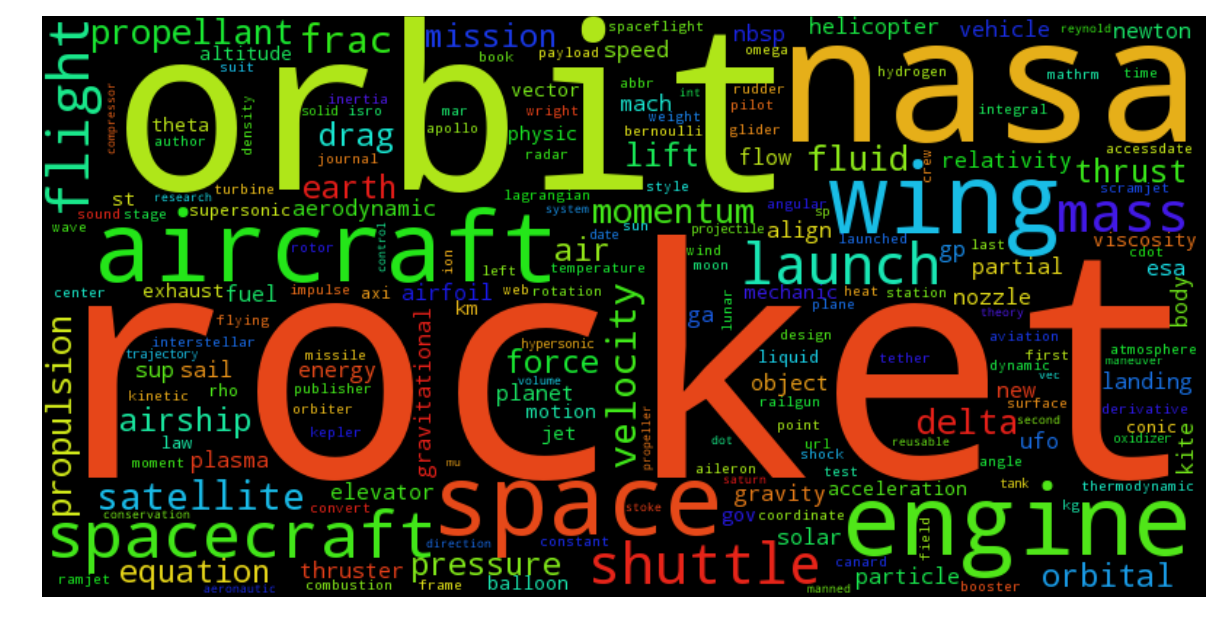

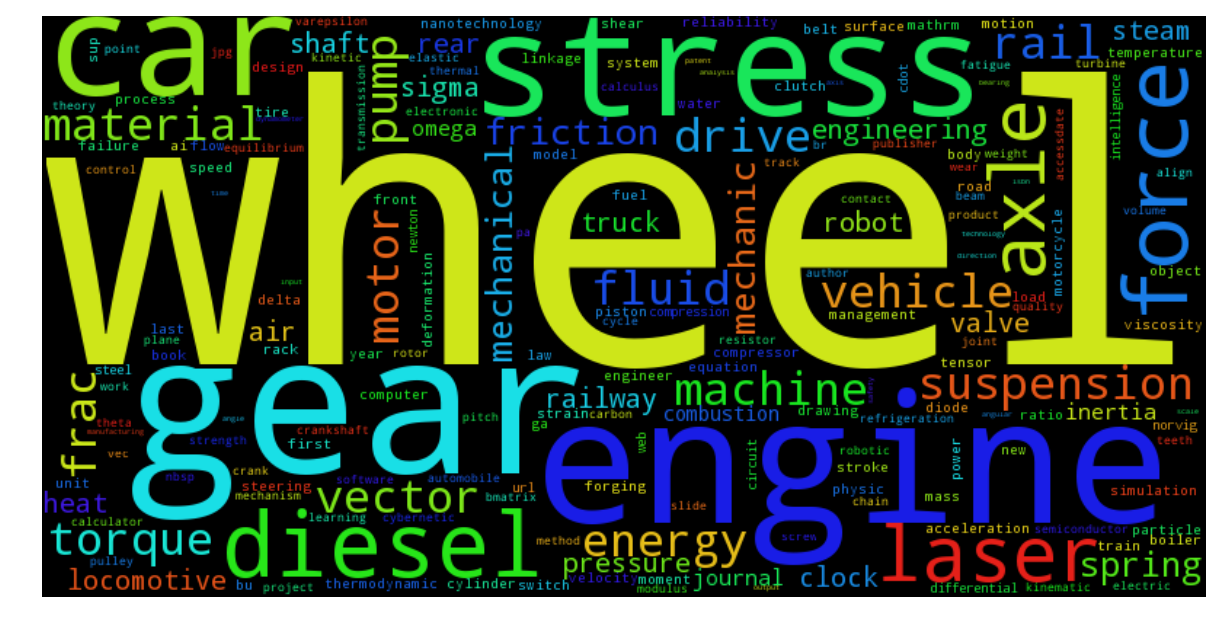

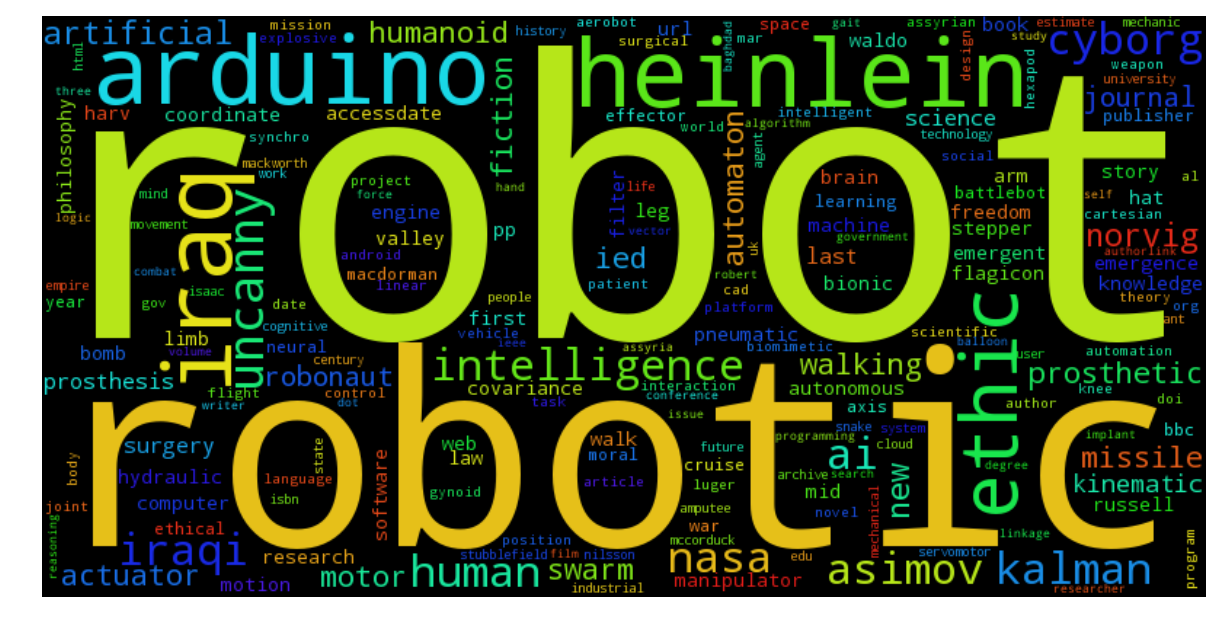

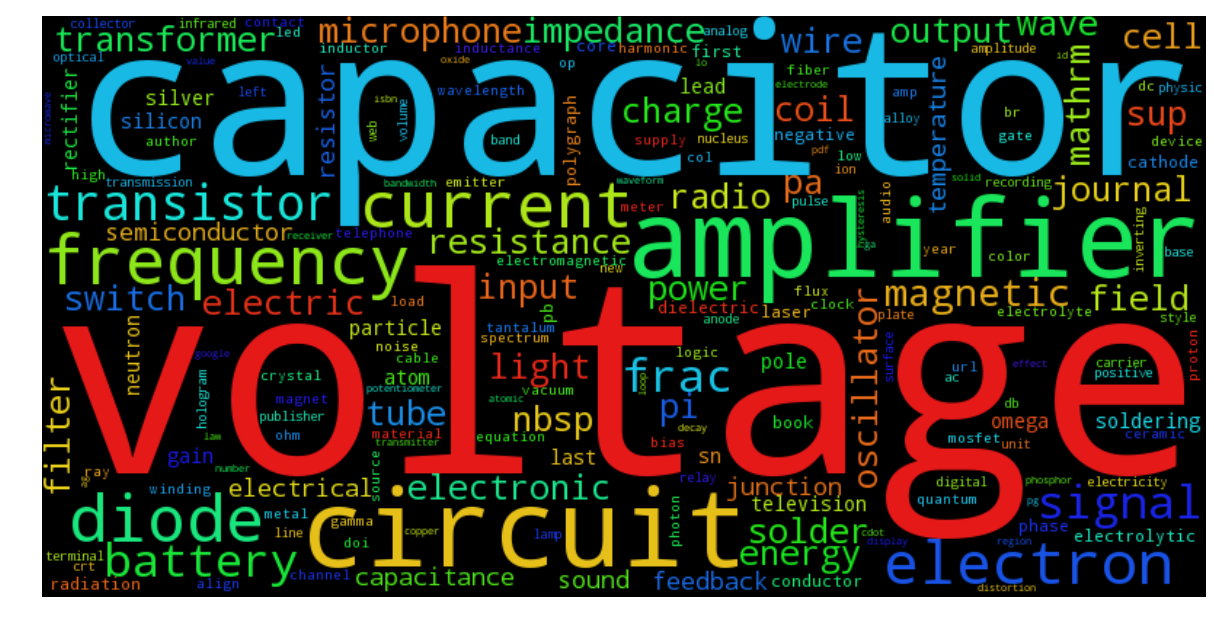

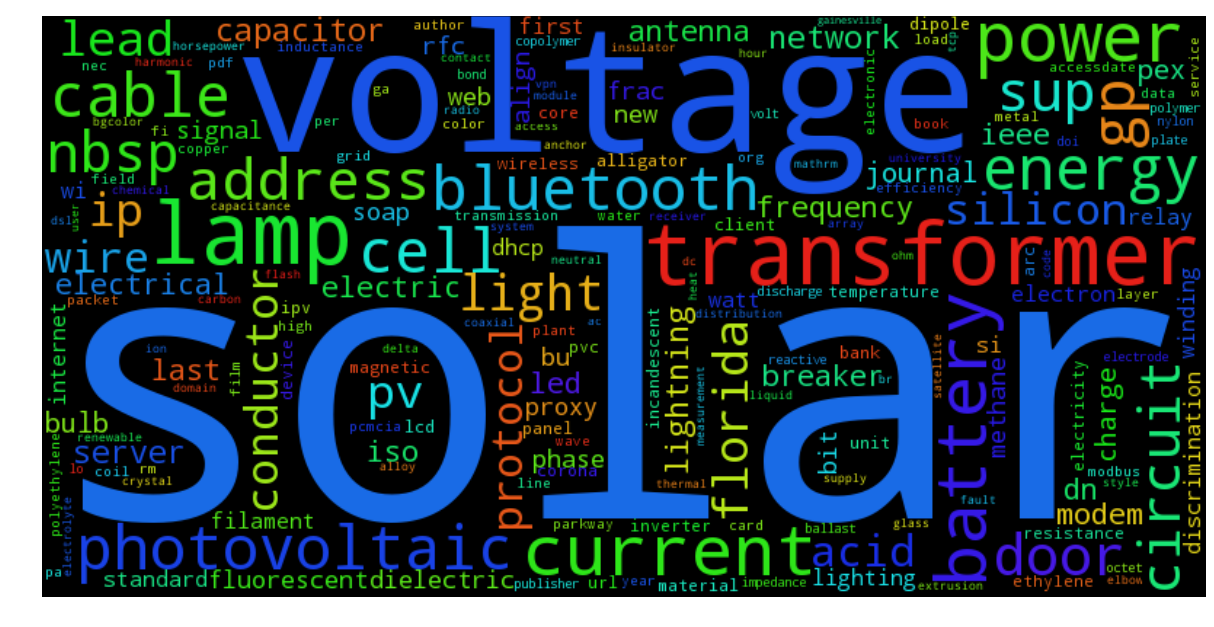

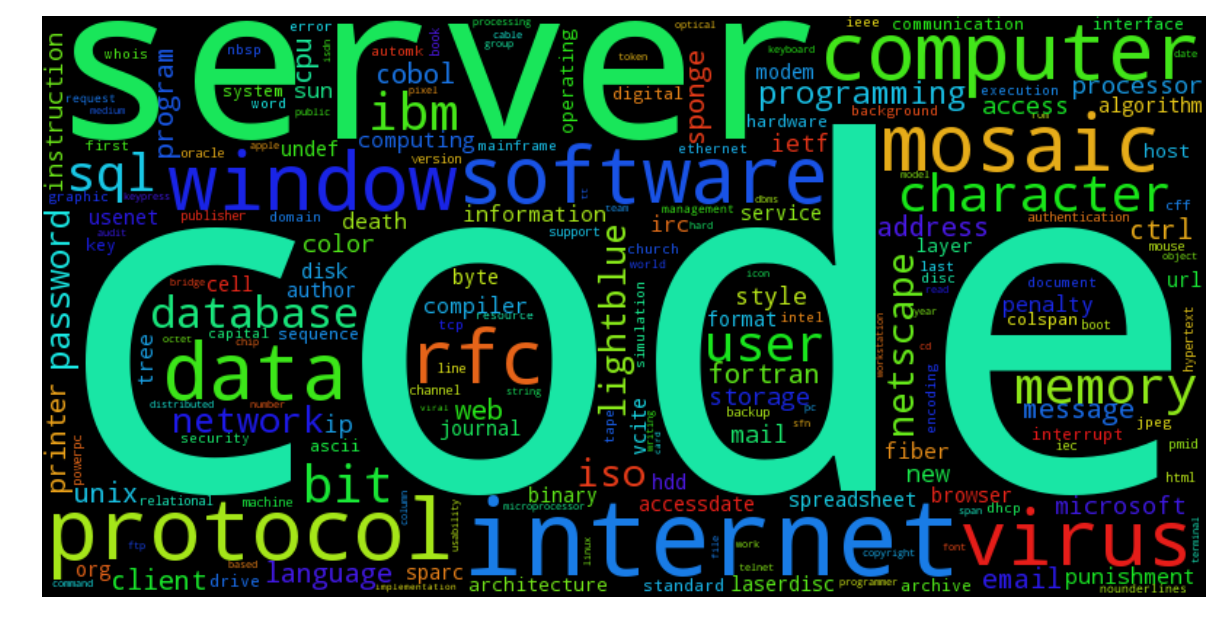

In [87]:
#plot a wordcloud for each branch
for b in branchNames:
    wordcloud = WordCloud(width=800, height=400).generate(word_clouds[b])
    plot.figure(figsize=(15,10))
    plot.imshow(wordcloud)
    plot.axis("off")

<font color='green' size = 5 ><b><i>CODE: APPENDIX</i></b></font>

This section was created in purpose to prestent tools and funcionds that have been designed in the course of the project development. Nevertheless, after careful analysis, we have decided that it will not be contributed to the main part of the project. At this point, we would like to let know that some more work has been done, then it is visible in jupyter notebook.

<b>The Shortest Path between two nodes

In [35]:
#Function for computing the shortest path between two nodes.
#Parameter: the graph, source and target.
#Returns a list with all the nodes in the shortest path.
def computeShorthesPathBetweenSourceTarget(graph, source, target):
    return nx.shortest_path(graph, source, target)

In [58]:
computeShorthesPathBetweenSourceTarget(TG_WCC, "radio", "robot")

['radio', u'technology', u'robotics', 'robot']

<b>Function for getting a source and a target (terms/subjects/topics) from stdin and return the shortest path between them. 

In [36]:
#Function that returns the shorthest path between source and target which are provided via stdin.
#Parameter: the graph. Returns the list of the nodes contained in the shortest path.
def learningPathFromASubjectToAnother(graph):
    print "For exit the loop type 'exit' and press ENTER."
    while(True):
        print ""
        n = raw_input("Enter the subject you know and the one you want to learn separated by space: ")
        if n == 'exit':
            return
        sourceTargetPair = n.split()
        if len(sourceTargetPair) != 2:
            print "You must enter exactly 2 terms."
            continue;
        source = sourceTargetPair[0]
        target = sourceTargetPair[1]
        if graph.has_node(source) is False:
            print "The source you have entered is invalid (is not contained in the graph)."
            continue
        if graph.has_node(target) is False:
            print "The target you have entered is invalid (is not contained in the graph)."
            continue
        learningPath = computeShorthesPathBetweenSourceTarget(graph, source, target)
        print ""
        print "This are the subjects you need to cover: "
        print learningPath
        return learningPath
        

In [59]:
learningPathFromASubjectToAnother(TG_WCC)

For exit the loop type 'exit' and press ENTER.

Enter the subject you know and the one you want to learn separated by space: exit


<b>Cosine Similarity

Cosine similarity could have been used to compare two text with each other. The main purpose, according to our project, could be to analyse an input text and be able to distinguuish what is the field of science, that this text is about. We have decided not to implement it on the website, while we agreed to concentrate more on the network analysis presented above.

In [203]:
Input_text = 'User text input.txt'

In [204]:
#functions used for calculations with the vectors
#find the length of the vector
def vector_sum(vector):
    vsum=0.0
    for v in vector:
        vsum+=vector[v]**2
    vsum = np.sqrt(vsum)
    return vsum
#calculate the dot product between two vectors
def dot_product(a,b):
    if len(a.keys())>len(b.keys()):
        v1 = a
        v2 = b
    else:
        v1 = b
        v2 = a
    vsum=0.0
    for k in v1:
        try:
            vsum+=v1[k]*v2[k]
        except KeyError:
            vsum+=0
    return vsum
#calculate cosine similarity of two vectors
def cosine_similarity(a,b):
    return dot_product(a,b)/(vector_sum(a)*vector_sum(b))

In [205]:
def calculate_similar_branch(textInput):
    input_tf = {}
    input_tfidf={}
    userInput = io.open(textInput, 'r', encoding='ISO-8859-1')
    userInput = userInput.read()
    userInput = re.sub(r'([^\w-]+)',' ',userInput)
    userInput = nltk.word_tokenize(userInput)
    #make all words to lower
    userInput = [item.lower() for item in userInput if item.lower() not in stopwords]
    input_tf = Counter(userInput)
    input_tf_present = [x for x in input_tf if x in unique_words]
    for w in input_tf_present:
        input_tfidf[w] = input_tf[w]*idf[w]
    similar_branch = " "
    similar_val = 0
    for b in branchNames:
        temp_val = cosine_similarity(tfidf_branches[b],input_tfidf)
        print b, temp_val
        if temp_val >  similar_val:
            similar_val = temp_val
            similar_branch = b
    return "\n The most similar branch is:" + similar_branch

In [206]:
result = calculate_similar_branch(Input_text)
print result

aerospace_list 0.0254839225077
mechanics_list 0.0632079236744
robotics_list 0.14173185374
electronic_list 0.0308040509344
electrical_list 0.027019623071
computer_science_list 0.0392911570829

 most similar branch:robotics_list


<B>DEGREE CENTRALITY

Measure indicating the most important nodes in the network, taking into accout number of in or out degrees coming from the node. Since we are using Betwenness Centrality and Eigen Vector Centrality to indicate the most important terms, we have not included this analysis in the main part of the project. Moreover, this values are corresponding to In and Out degrees list, which were presented and described in detail.

In [32]:
dciList = computeDegreeCentrality(TG_WCC, "in")
dciListSorted = sortDictionaryReversedByValues(dciList)

In [33]:
print '\x1b[1;31m'+"Input Degree Centrality list: " + '\x1b[0m' 
universalPrintList(dciListSorted, 25)

Input Degree Centrality list: 
voltage  -->  0.0836033700583
capacitor  -->  0.0699935191186
nasa  -->  0.0680492546986
energy  -->  0.0674011665587
frequency  -->  0.0648088139987
electron  -->  0.0628645495787
force  -->  0.0622164614388
physics  -->  0.0622164614388
magnetic field  -->  0.0589760207388
electronics  -->  0.0583279325988
alternating current  -->  0.0576798444588
temperature  -->  0.0570317563189
electric field  -->  0.0544394037589
transistor  -->  0.0537913156189
pressure  -->  0.0531432274789
resistor  -->  0.052495139339
mass  -->  0.052495139339
transformer  -->  0.051847051199
diode  -->  0.049254698639
vacuum tube  -->  0.048606610499
inductor  -->  0.0473104342191
semiconductor  -->  0.0440699935191
torque  -->  0.0434219053791
internet  -->  0.0434219053791
integrated circuit  -->  0.0434219053791


In [34]:
dcoList = computeDegreeCentrality(TG_WCC, "out")
dcoListSorted = sortDictionaryReversedByValues(dcoList)

In [35]:
print '\x1b[1;31m'+"Output Degree Centrality list: " + '\x1b[0m' 
universalPrintList(dcoListSorted, 25)

Output Degree Centrality list: 
electricity  -->  0.0414776409592
spacecraft propulsion  -->  0.0388852883992
amplifier  -->  0.0382372002592
amplifier#classification of amplifier stages and systems  -->  0.0382372002592
diode#junction diodes  -->  0.0375891121192
diode  -->  0.0375891121192
capacitor  -->  0.0362929358393
electronic component  -->  0.0356448476993
computer  -->  0.0356448476993
machine  -->  0.0343486714193
force  -->  0.0330524951393
classical mechanics  -->  0.0324044069994
fluid dynamics  -->  0.0311082307194
electric_current#conventions  -->  0.0291639662994
electron  -->  0.0285158781594
physics  -->  0.0265716137395
light-emitting diode  -->  0.0252754374595
vacuum tube  -->  0.0252754374595
rocket  -->  0.0252754374595
radio  -->  0.0246273493195
aerospace engineering  -->  0.0239792611795
negative resistance  -->  0.0220349967596
electromagnetic radiation  -->  0.0220349967596
transistor  -->  0.0220349967596
transformer  -->  0.0213869086196


<B>DEGREE CENTRALITY FOR SIX BRANCHES OF SCIENCE

In [51]:
graphsDciList = [] 
graphsDciListSorted = []
graphsDcoList = [] 
graphsDcoListSorted = []

for i in range(6):
    dciList = computeDegreeCentrality(graphsList[i], "in")
    graphsDciList.append(dciList)
    dciListSorted = sortDictionaryReversedByValues(dciList)
    graphsDciListSorted.append(dciListSorted)
    
    dcoList = computeDegreeCentrality(graphsList[i], "out")
    graphsDcoList.append(dcoList)
    dcoListSorted = sortDictionaryReversedByValues(dcoList)
    graphsDcoListSorted.append(dcoListSorted)

In [52]:
for i in range(6):    
    print "Input Degree Centrality list for " + scienceNames[i] +":"
    universalPrintList(graphsDciListSorted[i], 5)
    print ""

Input Degree Centrality list for aerospace:
nasa  -->  0.242957746479
spacecraft  -->  0.179577464789
thrust  -->  0.169014084507
orbit  -->  0.169014084507
space shuttle  -->  0.165492957746

Input Degree Centrality list for mechanics:
force  -->  0.161290322581
torque  -->  0.150537634409
energy  -->  0.143369175627
pressure  -->  0.129032258065
physics  -->  0.10752688172

Input Degree Centrality list for robotics:
robotics  -->  0.168831168831
robot  -->  0.155844155844
nasa  -->  0.12987012987
actuator  -->  0.0909090909091
artificial intelligence  -->  0.0909090909091

Input Degree Centrality list for electronic:
voltage  -->  0.201271186441
capacitor  -->  0.177966101695
frequency  -->  0.169491525424
electron  -->  0.148305084746
resistor  -->  0.14406779661

Input Degree Centrality list for electrical:
transformer  -->  0.117647058824
alternating current  -->  0.102167182663
circuit breaker  -->  0.0650154798762
capacitor  -->  0.0650154798762
watt  -->  0.061919504644

Input 

In [53]:
for i in range(6):    
    print "Output Degree Centrality list for " + scienceNames[i] +":"
    universalPrintList(graphsDcoListSorted[i], 5)
    print ""

Output Degree Centrality list for aerospace:
spacecraft propulsion  -->  0.197183098592
fluid dynamics  -->  0.130281690141
rocket  -->  0.119718309859
aerospace engineering  -->  0.0985915492958
orbital mechanics  -->  0.0950704225352

Output Degree Centrality list for mechanics:
machine  -->  0.125448028674
classical mechanics  -->  0.0752688172043
physics  -->  0.0716845878136
force  -->  0.0645161290323
diesel engine  -->  0.0573476702509

Output Degree Centrality list for robotics:
robotics  -->  0.181818181818
robot  -->  0.168831168831
bionics  -->  0.116883116883
artificial intelligence  -->  0.0909090909091
robot kinematics  -->  0.0909090909091

Output Degree Centrality list for electronic:
amplifier  -->  0.110169491525
amplifier#classification of amplifier stages and systems  -->  0.110169491525
diode  -->  0.108050847458
diode#junction diodes  -->  0.108050847458
electronic component  -->  0.101694915254

Output Degree Centrality list for electrical:
electricity  -->  0.06

UnicodeEncodeError: 'ascii' codec can't encode character u'\u2013' in position 6: ordinal not in range(128)